In [1]:
!pip install tabulate
!pip install texttable
!pip install pymorphy3
!pip install catboost
!pip install xgboost
!pip install progressbar2
!pip install tsfresh
!pip install -U imbalanced-learn
!pip install eli5
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=80272c83316a58e8dc9fff1b3d288511325487fe8f7c286332f15f0838b6fd52
  Stored in directory: /root/.cache/pip/wheels/

In [2]:
import re
import time
import datetime
import csv
import requests
import joblib
import random

# python -m pip install pandas tabulate
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup # для парсера HTML
import openpyxl # для парсера XLSX (Excel)

import pymorphy3 # работа с русским языком, pymorphy3

import texttable as tt

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # Кодирование категориальных данных

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # Масштабирование данных

from sklearn.feature_selection import SelectKBest # Выбор признаков с наивысшими оценками
from sklearn.feature_selection import chi2 # Выбор признаков по Хи квадрат

from sklearn.model_selection import train_test_split # Деление выборки на тестовые и тренировочные данные
from sklearn.model_selection import cross_val_score # Оценка качества работы модели

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, classification_report # Критерий качества, точности

# from sklearn.neighbors import KNeighborsClassifier # Обучение модели K-ближайших соседей
# from sklearn.ensemble import BaggingClassifier # Комплексный метаоценщик
# from sklearn.ensemble import RandomForestClassifier # Ансамбли деревьев решений
# from sklearn.ensemble import GradientBoostingClassifier # Ансамбли градиентного спуска (повышения градиента)
# from sklearn.ensemble import ExtraTreesClassifier # Дополнительные деревья
# from sklearn.ensemble import AdaBoostClassifier # Алгоритм усиления ансамбля
# from sklearn.ensemble import VotingClassifier # Стэккинг (способ объединения прогнозов)
# from sklearn.tree import DecisionTreeClassifier # Деревья решений
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier

from sklearn.ensemble import BaggingRegressor # Комплексный метаоценщик
from sklearn.ensemble import GradientBoostingRegressor # Ансамбли градиентного спуска (повышения градиента)
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor # Стэккинг (способ объединения прогнозов)
from sklearn.ensemble import AdaBoostRegressor # Алгоритм усиления ансамбля
from sklearn.ensemble import ExtraTreesRegressor # Дополнительные деревья
from sklearn.ensemble import RandomForestRegressor # Ансамбли деревьев решений (случайный лес)
from sklearn.tree import DecisionTreeRegressor # Деревья решений
from sklearn.linear_model import LinearRegression # Линейная регрессия (метод наименьших квадратов)
from sklearn.neighbors import KNeighborsRegressor # Обучение модели K-ближайших соседей
from sklearn.svm import SVR # метод опорных векторов с линейным ядром
from sklearn.linear_model import LogisticRegression # логистическая регрессия

# python -m pip install catboost
from catboost import CatBoostRegressor

# python -m pip install xgboost
from xgboost import XGBRegressor

from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif # Статистический метод
from sklearn.metrics import r2_score

# python -m pip install mlxtend
from mlxtend.plotting import plot_decision_regions

# Feature engineering:
# python -m pip install progressbar2
import progressbar

# python -m pip install tsfresh
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_extraction import settings
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters, ComprehensiveFCParameters

# python -m pip install -U imbalanced-learn
# python -m pip install eli5
# import eli5
# from eli5.sklearn import PermutationImportance

# Подготавливаю данные о погоде в "село Сембург", близлежайшее поселение к нефтянной скважины №807 (в 24 км). Разрабатываю парсер сайтов о погоде.

In [3]:
# проведу осмотр данных прогноза погоды в с. Самбург на сайте Яндекс.Погода за текущий год (на данный момент это 2023 год)
# lat=66.80035786146756 (Широта)
# lng=78.38975066524623 (Долгота)

month = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

morph = pymorphy3.MorphAnalyzer(lang='ru')

data = []
data_i = 0
for j, item in enumerate(month):
  url = 'https://yandex.ru/pogoda/month/{item}?lat={latitude}&lon={lontitude}'
  url = url.format(item=item, latitude=66.80035786146756, lontitude=78.38975066524623)
  print(url)
  page = requests.get(url)
  bs = BeautifulSoup(page.text, 'html.parser')

  # информация о погоде в с. Самбург за каждый месяц
  for i, val in enumerate(bs.find('table', {'class': 'climate-calendar'}).find_all('td', {'class': 'climate-calendar__cell'})):
    temp = []
    if val.find('div', {'class': 'climate-calendar-day_colorless_yes'}):
      continue
    temp.append(int(data_i))
    temp.append(int(val.find('div', {'class': 'climate-calendar-day__detailed-container-center'}).find_next('h6').text.split(',', 1)[0].split(' ', 1)[0]))
    temp.append(str(morph.parse(val.find('div', {'class': 'climate-calendar-day__detailed-container-center'}).find_next('h6').text.split(',', 1)[0].split(' ', 1)[1])[0].normal_form))
    temp.append(2023)
    temp.append(str(val.find('div', {'class': 'climate-calendar-day__detailed-container-center'}).find_next('h6').text.split(',', 1)[1]))
    temp.append(int(val.find('div', {'class': 'temp climate-calendar-day__detailed-basic-temp-day'}).find('span').text.replace('−', '-')))
    temp.append(int(val.find('div', {'class': 'temp climate-calendar-day__detailed-basic-temp-night'}).find('span').text.replace('−', '-')))
    temp.append(int(val.find_all('td', {'class': 'climate-calendar-day__detailed-data-table-cell climate-calendar-day__detailed-data-table-cell_value_yes'})[0].text.split(' ', 1)[0]))
    temp.append(int(val.find_all('td', {'class': 'climate-calendar-day__detailed-data-table-cell climate-calendar-day__detailed-data-table-cell_value_yes'})[1].text.split('%', 1)[0]) / 100)
    temp.append(float(val.find_all('td', {'class': 'climate-calendar-day__detailed-data-table-cell climate-calendar-day__detailed-data-table-cell_value_yes'})[2].find('div').text))
    temp.append(str(val.find_all('td', {'class': 'climate-calendar-day__detailed-data-table-cell climate-calendar-day__detailed-data-table-cell_value_yes'})[2].find('abbr').text))
    print(temp)
    data.append(temp)
    data_i += 1

# Датафрейм из массива
df = pd.DataFrame(data, columns=['id', 'День', 'Месяц', 'Год', 'День недели', 'Температура днем', 'Температура ночью', 'Давление (мм рт. ст.)', 'Влажность (%)', 'Скорость ветра', 'Направление ветра'])
df

https://yandex.ru/pogoda/month/january?lat=66.80035786146756&lon=78.38975066524623
[0, 1, 'январь', 2023, ' вс', -21, -26, 760, 0.76, 5.3, 'ЮВ']
[1, 2, 'январь', 2023, ' пн', -22, -22, 763, 0.79, 5.3, 'З']
[2, 3, 'январь', 2023, ' вт', -21, -22, 764, 0.79, 5.8, 'Ю']
[3, 4, 'январь', 2023, ' ср', -17, -20, 762, 0.81, 6.5, 'Ю']
[4, 5, 'январь', 2023, ' чт', -19, -22, 764, 0.8, 6.0, 'Ю']
[5, 6, 'январь', 2023, ' пт', -20, -22, 766, 0.79, 5.5, 'Ю']
[6, 7, 'январь', 2023, ' сб', -19, -21, 766, 0.76, 4.8, 'Ю']
[7, 8, 'январь', 2023, ' вс', -20, -22, 763, 0.76, 5.3, 'ЮВ']
[8, 9, 'январь', 2023, ' пн', -22, -22, 761, 0.77, 5.5, 'Ю']
[9, 10, 'январь', 2023, ' вт', -21, -24, 760, 0.77, 5.8, 'Ю']
[10, 11, 'январь', 2023, ' ср', -24, -24, 762, 0.76, 5.1, 'Ю']
[11, 12, 'январь', 2023, ' чт', -21, -21, 758, 0.77, 6.5, 'Ю']
[12, 13, 'январь', 2023, ' пт', -19, -22, 756, 0.8, 6.4, 'Ю']
[13, 14, 'январь', 2023, ' сб', -20, -20, 757, 0.79, 5.4, 'ЮВ']
[14, 15, 'январь', 2023, ' вс', -17, -20, 759, 0.8, 4

id  День    Месяц   Год День недели  Температура днем  \
0      0     1   январь  2023          вс               -21   
1      1     2   январь  2023          пн               -22   
2      2     3   январь  2023          вт               -21   
3      3     4   январь  2023          ср               -17   
4      4     5   январь  2023          чт               -19   
..   ...   ...      ...   ...         ...               ...   
360  360    27  декабрь  2023          ср               -18   
361  361    28  декабрь  2023          чт               -18   
362  362    29  декабрь  2023          пт               -19   
363  363    30  декабрь  2023          сб               -19   
364  364    31  декабрь  2023          вс               -19   

     Температура ночью  Давление (мм рт. ст.)  Влажность (%)  Скорость ветра  \
0                  -26                    760           0.76             5.3   
1                  -22                    763           0.79             5.3   
2                  -22                    764           0.79             5.8   
3                  -20                    762           0.81             6.5   
4                  -22                    764           0.80             6.0   
..                 ...                    ...            ...             ...   
360                -20                    753           0.81             5.5   
361                -20                    756           0.81             5.0   
362                -21                    759           0.81             5.5   
363                -20                    760           0.80             5.8   
364                -20                    760           0.80             5.8   

    Направление ветра  
0                  ЮВ  
1                   З  
2                   Ю  
3                   Ю  
4                   Ю  
..                ...  
360                 Ю  
361                 Ю  
362                 Ю  
363                 Ю  
364                 Ю  

[365 rows x 11 columns]

In [4]:
# cоздаю объект Texttable
tab = tt.Texttable()

# устанавливаю стили таблицы
tab.set_cols_align(['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c'])
tab.header(['id', 'День', 'Месяц', 'Год', 'День недели', 'Температура днем', 'Температура ночью', 'Давление (мм рт. ст.)', 'Влажность (%)', 'Скорость ветра', 'Направление ветра'])

# преобразую DataFrame в список списков (двумерный список)
data_list = df.values.tolist()

# добавляю данные в таблицу
for row in data_list:
  tab.add_row(row)

# получаю отформатированную таблицу в виде строки
table_string = tab.draw()

# вывожу таблицу на экран
print(table_string)

+-----+------+-------+------+-------+-------+------+------+------+------+------+
| id  | День | Месяц | Год  | День  | Темпе | Темп | Давл | Влаж | Скор | Напр |
|     |      |       |      | недел | ратур | ерат | ение | ност | ость | авле |
|     |      |       |      |   и   |   а   | ура  | (мм  |  ь   | ветр | ние  |
|     |      |       |      |       | днем  | ночь | рт.  | (%)  |  а   | ветр |
|     |      |       |      |       |       |  ю   | ст.) |      |      |  а   |
+=====+======+=======+======+=======+=======+======+======+======+======+======+
|  0  |  1   | январ | 2023 |   вс  |  -21  | -26  | 760  | 0.76 | 5.30 |  ЮВ  |
|     |      |   ь   |      |       |       |      |      |  0   |  0   |      |
+-----+------+-------+------+-------+-------+------+------+------+------+------+
|  1  |  2   | январ | 2023 |   пн  |  -22  | -22  | 763  | 0.79 | 5.30 |  З   |
|     |      |   ь   |      |       |       |      |      |  0   |  0   |      |
+-----+------+-------+------

# Как видно я получил данные с Яндекс.Погода за 2023 года, мне нужно больше данных. У Яндекс.Погода нет архивных данных, поэтому буду использовать другой сайт с архивными данными.

In [5]:
# рассмотрю данные прогноза погоды в с. Самбург с сайта Погода1 (так как в нем есть архивные данные)
url = 'https://pogoda1.ru/samburg/arkhiv/'
page = requests.get(url)
bs = BeautifulSoup(page.text, 'html.parser')

# Формирую список диапозона даты, где имеются архивные данные
year = bs.find('select', {'class': 'select-archive-year'}).find_all('option')
month = bs.find('select', {'class': 'select-archive-month'}).find_all('option')

# Перевод месяцев с русского на английский язык
def month_translate(month):
  month = month.lower()
  if month == "январь":
    return "january"
  elif month == "февраль":
    return "february"
  elif month == "март":
    return "march"
  elif month == "апрель":
    return "april"
  elif month == "май":
    return "may"
  elif month == "июнь":
    return "june"
  elif month == "июль":
    return "july"
  elif month == "август":
    return "august"
  elif month == "сентябрь":
    return "september"
  elif month == "октябрь":
    return "october"
  elif month == "ноябрь":
    return "november"
  elif month == "декабрь":
    return "december"

base_month = []
for i, val_year in enumerate(year):
  for j, val_month in enumerate(month):
    temp_0 = []
    if j > 0:
      temp_0.append(int(val_year.text))
      temp_0.append(str(month_translate(month = val_month.text)).lower())
      base_month.append(temp_0)

# Формирую список URL адресов с данными
url_parse = 'https://pogoda1.ru/samburg/{month}-{year}/'

for i, val in enumerate(base_month):
  parse = url_parse.format(month=val[1], year=val[0])
  base_month[i].append(parse)

df = pd.DataFrame(base_month, columns=['Год', 'Месяц', 'URL'])
df


Год      Месяц                                         URL
0   2017    january    https://pogoda1.ru/samburg/january-2017/
1   2017   february   https://pogoda1.ru/samburg/february-2017/
2   2017      march      https://pogoda1.ru/samburg/march-2017/
3   2017      april      https://pogoda1.ru/samburg/april-2017/
4   2017        may        https://pogoda1.ru/samburg/may-2017/
..   ...        ...                                         ...
79  2023     august     https://pogoda1.ru/samburg/august-2023/
80  2023  september  https://pogoda1.ru/samburg/september-2023/
81  2023    october    https://pogoda1.ru/samburg/october-2023/
82  2023   november   https://pogoda1.ru/samburg/november-2023/
83  2023   december   https://pogoda1.ru/samburg/december-2023/

[84 rows x 3 columns]

In [6]:
# Перевод месяцев с текста на цифры
def month_number(month):
  month = month.lower()
  if month == "january":
    return "01"
  elif month == "february":
    return "02"
  elif month == "march":
    return "03"
  elif month == "april":
    return "04"
  elif month == "may":
    return "05"
  elif month == "june":
    return "06"
  elif month == "july":
    return "07"
  elif month == "august":
    return "08"
  elif month == "september":
    return "09"
  elif month == "october":
    return "10"
  elif month == "november":
    return "11"
  elif month == "december":
    return "12"

# Поиск существующих ссылок с данными
base_day = []
for i, val in enumerate(base_month):
  bs = BeautifulSoup(requests.get(val[2]).text, 'html.parser')
  if (bs.find('div', {'class': 'month-calendar calendar'})):
    print(val[2])
    for j, item in enumerate(bs.find_all('a', {'class': 'calendar-item'})):
      temp = []
      if not (item.find('span', {'class': 'no-data'})):
        temp.append(int(val[0]))
        temp.append(int(month_number(val[1])))
        temp.append(int(item.find('span', {'month-calendar-day'}).text))
        temp.append('https://pogoda1.ru' + str(item['href']))
        print(temp)
        base_day.append(temp)

https://pogoda1.ru/samburg/june-2017/
[2017, 6, 7, 'https://pogoda1.ru/samburg/07-06-2017/']
[2017, 6, 8, 'https://pogoda1.ru/samburg/08-06-2017/']
[2017, 6, 9, 'https://pogoda1.ru/samburg/09-06-2017/']
[2017, 6, 10, 'https://pogoda1.ru/samburg/10-06-2017/']
[2017, 6, 11, 'https://pogoda1.ru/samburg/11-06-2017/']
[2017, 6, 12, 'https://pogoda1.ru/samburg/12-06-2017/']
[2017, 6, 13, 'https://pogoda1.ru/samburg/13-06-2017/']
[2017, 6, 14, 'https://pogoda1.ru/samburg/14-06-2017/']
[2017, 6, 15, 'https://pogoda1.ru/samburg/15-06-2017/']
[2017, 6, 16, 'https://pogoda1.ru/samburg/16-06-2017/']
[2017, 6, 17, 'https://pogoda1.ru/samburg/17-06-2017/']
[2017, 6, 18, 'https://pogoda1.ru/samburg/18-06-2017/']
[2017, 6, 19, 'https://pogoda1.ru/samburg/19-06-2017/']
[2017, 6, 20, 'https://pogoda1.ru/samburg/20-06-2017/']
[2017, 6, 21, 'https://pogoda1.ru/samburg/21-06-2017/']
[2017, 6, 22, 'https://pogoda1.ru/samburg/22-06-2017/']
[2017, 6, 23, 'https://pogoda1.ru/samburg/23-06-2017/']
[2017, 6, 24,

In [7]:
# Парсер погоды
data = []
for i, val in enumerate(base_day):
  # if i < 1593:
  #   continue
  temp = []
  bs = BeautifulSoup(requests.get(val[3]).text, 'html.parser')
  if not (bs.find('div', {'class': 'panel-heading'}).text == '404 Страница не найдена'):
    # print(val[3])
    temp.append(i)
    temp.append(val[0])
    temp.append(val[1])
    temp.append(val[2])
    temp.append(str(bs.find('img', {'class': 'weather-now-icon-img'})['title']).lower())
    if (bs.find('div', {'class': 'weather-now-col weather-now-col-main'}).find('span', {'class': 'wind-amount'})):
      temp.append(str(bs.find_all('span', {'class': 'wind-amount'})[0].text.split(',', 1)[0]).lower())
      temp.append(int(bs.find_all('span', {'class': 'wind-amount'})[0].text.split(',', 1)[1].split(' ', 2)[1]))
    else:
      for j, item in enumerate(bs.find_all('div', {'row-forecast-time-of-day'})):
        if not (str(item.find('div', {'class': 'cell-forecast-wind'}).find('span', {'class': 'wind'}).text) == 'нет'):
          temp.append(str(item.find('div', {'class': 'cell-forecast-wind'}).find('img', {'class': 'icon-wind'})['title'].split(' ', 1)[0]).lower())
          temp.append(int(item.find('div', {'class': 'cell-forecast-wind'}).find('span', {'class': 'wind-amount'}).text.split(' ', 1)[0]))
        else:
          temp.append('')
          temp.append('')
        break
    temp.append(int(bs.find_all('div', {'class': 'weather-now-info'})[0].find('span', {'class': 'value'}).text.split(' ', 1)[0]))
    temp.append(int(bs.find_all('div', {'class': 'weather-now-info'})[1].find('span', {'class': 'value'}).text.split('%', 1)[0]))
    temp.append(float(bs.find_all('div', {'class': 'weather-now-info'})[2].find('span', {'class': 'value'}).text.split(' ', 1)[0]))
    temp.append(str(bs.find_all('div', {'class': 'weather-now-info'})[6].find('span', {'class': 'value'}).text.split(' ', 1)[0]).lower())
    # temp.append(int(bs.find_all('div', {'class': 'weather-now-info'})[6].find('span', {'class': 'value'}).text.split(' ', 1)[1].split('%', 1)[0]))
    if not (str(bs.find_all('div', {'row-forecast-time-of-day'})[2].find('div', {'class': 'cell-forecast-prec opened'}))):
      if (str(bs.find_all('div', {'row-forecast-time-of-day'})[2].find('div', {'class': 'cell-forecast-prec'}).text) == 'без осадков'):
        temp.append(0)
      else:
        temp.append(float(bs.find_all('div', {'row-forecast-time-of-day'})[2].find('div', {'class': 'cell-forecast-prec'}).text.split(' ', 1)[0]))
    else:
      if (str(bs.find_all('div', {'row-forecast-time-of-day'})[1].find('div', {'class': 'cell-forecast-prec'}).text) == 'без осадков'):
        temp.append(0)
      else:
        temp.append(float(bs.find_all('div', {'row-forecast-time-of-day'})[1].find('div', {'class': 'cell-forecast-prec'}).text.split(' ', 1)[0]))
    temp.append(int(bs.find_all('div', {'row-forecast-time-of-day'})[0].find('div', {'class': 'cell-forecast-temp'}).text.split('°', 1)[0]))
    if not (str(bs.find_all('div', {'row-forecast-time-of-day'})[2].find('div', {'class': 'cell-forecast-prec opened'}))):
      temp.append(int(bs.find_all('div', {'row-forecast-time-of-day'})[2].find('div', {'class': 'cell-forecast-temp'}).text.split('°', 1)[0]))
    else:
      temp.append(int(bs.find_all('div', {'row-forecast-time-of-day'})[1].find('div', {'class': 'cell-forecast-temp'}).text.split('°', 1)[0]))
    temp.append(val[3])
    print(temp)
    data.append(temp)

[0, 2017, 6, 7, 'пасмурно', 'северо-западный', 4, 764, 56, 10.0, 'растущая', 0, 9, 13, 'https://pogoda1.ru/samburg/07-06-2017/']
[1, 2017, 6, 8, 'ясно', 'северо-западный', 3, 762, 63, 10.0, 'растущая', 0, 9, 13, 'https://pogoda1.ru/samburg/08-06-2017/']
[2, 2017, 6, 9, 'малооблачно', 'северный', 3, 756, 51, 10.0, 'полнолуние', 0, 12, 15, 'https://pogoda1.ru/samburg/09-06-2017/']
[3, 2017, 6, 10, 'пасмурно', 'северо-западный', 8, 752, 60, 10.0, 'убывающая', 0, 10, 10, 'https://pogoda1.ru/samburg/10-06-2017/']
[4, 2017, 6, 11, 'пасмурно', 'западный', 6, 756, 50, 10.0, 'убывающая', 0, 4, 2, 'https://pogoda1.ru/samburg/11-06-2017/']
[5, 2017, 6, 12, 'пасмурно', 'южный', 6, 758, 70, 10.0, 'убывающая', 0, 5, 12, 'https://pogoda1.ru/samburg/12-06-2017/']
[6, 2017, 6, 13, 'пасмурно', 'юго-восточный', 2, 758, 100, 10.0, 'убывающая', 1.1, 5, 9, 'https://pogoda1.ru/samburg/13-06-2017/']
[7, 2017, 6, 14, 'пасмурно', 'южный', 9, 759, 65, 10.0, 'убывающая', 0, 6, 15, 'https://pogoda1.ru/samburg/14-0

In [8]:
# Оформляю в DataFrame
df = pd.DataFrame(data, columns=[
  'id',
  'год',
  'месяц',
  'день',
  'погодное условие',
  'направление ветра',
  'скорость ветра (м/с)',
  'давление (мм рт. ст.)',
  'влажность (%)',
  'видимость (мм)',
  'луна',
  'осадки (мм)',
  'температура днем',
  'температура ночью',
  'url'
])
# df.drop(columns=["id"], inplace=True)

# Сохранение данных в csv
df.to_csv('/content/data_samburg_weather.csv', sep=',', encoding='utf-8', index=False)
df

id   год  месяц  день погодное условие направление ветра  \
0        0  2017      6     7         пасмурно   северо-западный   
1        1  2017      6     8             ясно   северо-западный   
2        2  2017      6     9      малооблачно          северный   
3        3  2017      6    10         пасмурно   северо-западный   
4        4  2017      6    11         пасмурно          западный   
...    ...   ...    ...   ...              ...               ...   
2352  2352  2023     11    22         пасмурно             южный   
2353  2353  2023     11    23         пасмурно     юго-восточный   
2354  2354  2023     11    24         пасмурно   северо-западный   
2355  2355  2023     11    25         пасмурно          западный   
2356  2356  2023     11    26      малооблачно         восточный   

     скорость ветра (м/с)  давление (мм рт. ст.)  влажность (%)  \
0                       4                    764             56   
1                       3                    762             63   
2                       3                    756             51   
3                       8                    752             60   
4                       6                    756             50   
...                   ...                    ...            ...   
2352                    8                    758             85   
2353                    5                    750             92   
2354                    4                    749             96   
2355                    5                    759             97   
2356                    4                    768             94   

      видимость (мм)        луна  осадки (мм)  температура днем  \
0               10.0    растущая          0.0                 9   
1               10.0    растущая          0.0                 9   
2               10.0  полнолуние          0.0                12   
3               10.0   убывающая          0.0                10   
4               10.0   убывающая          0.0                 4   
...              ...         ...          ...               ...   
2352            10.0    растущая          0.0               -10   
2353            10.0    растущая          0.0               -13   
2354            10.0    растущая          0.0               -27   
2355            10.0    растущая          0.0               -27   
2356            10.0    растущая          0.0               -22   

      температура ночью                                     url  
0                    13  https://pogoda1.ru/samburg/07-06-2017/  
1                    13  https://pogoda1.ru/samburg/08-06-2017/  
2                    15  https://pogoda1.ru/samburg/09-06-2017/  
3                    10  https://pogoda1.ru/samburg/10-06-2017/  
4                     2  https://pogoda1.ru/samburg/11-06-2017/  
...                 ...                                     ...  
2352                 -9  https://pogoda1.ru/samburg/22-11-2023/  
2353                -11  https://pogoda1.ru/samburg/23-11-2023/  
2354                -14  https://pogoda1.ru/samburg/24-11-2023/  
2355                -27  https://pogoda1.ru/samburg/25-11-2023/  
2356                -25  https://pogoda1.ru/samburg/26-11-2023/  

[2357 rows x 15 columns]

# Необходимые данные получил в размере 2356 строк. Сохранил данные в файл и загрузил к себе в Git репозиторий. Дальше идет подготовка данных, а именно просмотр пустот и заполнения средними или наиболее встречающимися значениями, просмотр типов данных.

In [9]:
# Загрузка файла из Git моего репозитория в Pandas
# data_samburg_weather = pd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/exam/data_samburg_weather.csv', sep=',', index_col=False, quoting=csv.QUOTE_MINIMAL)
data_samburg_weather = pd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/exam/data_samburg_weather.csv', sep=',', index_col=False)
data_samburg_weather

id   год  месяц  день погодное условие направление ветра  \
0        0  2017      6     7         пасмурно   северо-западный   
1        1  2017      6     8             ясно   северо-западный   
2        2  2017      6     9      малооблачно          северный   
3        3  2017      6    10         пасмурно   северо-западный   
4        4  2017      6    11         пасмурно          западный   
...    ...   ...    ...   ...              ...               ...   
2352  2352  2023     11    22         пасмурно             южный   
2353  2353  2023     11    23         пасмурно     юго-восточный   
2354  2354  2023     11    24         пасмурно   северо-западный   
2355  2355  2023     11    25         пасмурно          западный   
2356  2356  2023     11    26      малооблачно         восточный   

      скорость ветра (м/с)  давление (мм рт. ст.)  влажность (%)  \
0                      4.0                    764             56   
1                      3.0                    762             63   
2                      3.0                    756             51   
3                      8.0                    752             60   
4                      6.0                    756             50   
...                    ...                    ...            ...   
2352                   8.0                    758             85   
2353                   5.0                    750             92   
2354                   4.0                    749             96   
2355                   5.0                    759             97   
2356                   4.0                    768             94   

      видимость (мм)        луна  осадки (мм)  температура днем  \
0               10.0    растущая          0.0                 9   
1               10.0    растущая          0.0                 9   
2               10.0  полнолуние          0.0                12   
3               10.0   убывающая          0.0                10   
4               10.0   убывающая          0.0                 4   
...              ...         ...          ...               ...   
2352            10.0    растущая          0.0               -10   
2353            10.0    растущая          0.0               -13   
2354            10.0    растущая          0.0               -27   
2355            10.0    растущая          0.0               -27   
2356            10.0    растущая          0.0               -22   

      температура ночью                                     url  
0                    13  https://pogoda1.ru/samburg/07-06-2017/  
1                    13  https://pogoda1.ru/samburg/08-06-2017/  
2                    15  https://pogoda1.ru/samburg/09-06-2017/  
3                    10  https://pogoda1.ru/samburg/10-06-2017/  
4                     2  https://pogoda1.ru/samburg/11-06-2017/  
...                 ...                                     ...  
2352                 -9  https://pogoda1.ru/samburg/22-11-2023/  
2353                -11  https://pogoda1.ru/samburg/23-11-2023/  
2354                -14  https://pogoda1.ru/samburg/24-11-2023/  
2355                -27  https://pogoda1.ru/samburg/25-11-2023/  
2356                -25  https://pogoda1.ru/samburg/26-11-2023/  

[2357 rows x 15 columns]

In [10]:
# Размер данных (количество строк, колонок)
data_samburg_weather.shape

(2357, 15)

In [11]:
# Просмотр типов данных в датасете
print(data_samburg_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2357 non-null   int64  
 1   год                    2357 non-null   int64  
 2   месяц                  2357 non-null   int64  
 3   день                   2357 non-null   int64  
 4   погодное условие       2357 non-null   object 
 5   направление ветра      2355 non-null   object 
 6   скорость ветра (м/с)   2355 non-null   float64
 7   давление (мм рт. ст.)  2357 non-null   int64  
 8   влажность (%)          2357 non-null   int64  
 9   видимость (мм)         2357 non-null   float64
 10  луна                   2357 non-null   object 
 11  осадки (мм)            2357 non-null   float64
 12  температура днем       2357 non-null   int64  
 13  температура ночью      2357 non-null   int64  
 14  url                    2357 non-null   object 
dtypes: f

In [12]:
# Проверка данных

# Количество пустых ячеек
data_samburg_weather.isnull().sum()

id                       0
год                      0
месяц                    0
день                     0
погодное условие         0
направление ветра        2
скорость ветра (м/с)     2
давление (мм рт. ст.)    0
влажность (%)            0
видимость (мм)           0
луна                     0
осадки (мм)              0
температура днем         0
температура ночью        0
url                      0
dtype: int64

In [13]:
# Количество неопределенные значений (неправильно считанные)
data_samburg_weather.isna().sum()

id                       0
год                      0
месяц                    0
день                     0
погодное условие         0
направление ветра        2
скорость ветра (м/с)     2
давление (мм рт. ст.)    0
влажность (%)            0
видимость (мм)           0
луна                     0
осадки (мм)              0
температура днем         0
температура ночью        0
url                      0
dtype: int64

In [14]:
# Колличество пустых строк
(data_samburg_weather == "").sum()

id                       0
год                      0
месяц                    0
день                     0
погодное условие         0
направление ветра        0
скорость ветра (м/с)     0
давление (мм рт. ст.)    0
влажность (%)            0
видимость (мм)           0
луна                     0
осадки (мм)              0
температура днем         0
температура ночью        0
url                      0
dtype: int64

In [15]:
# Заполнение данных

# Заполнение пустых значений - наиболее встречающимся классом
# df['направление ветра'] = df['направление ветра'].replace('', str(df['направление ветра'].value_counts().index[0]))
data_samburg_weather['направление ветра'].fillna(str(data_samburg_weather['направление ветра'].value_counts().index[0]), inplace = True)

# Заполнение пустых значений - наиболее распространенного значения
# data_samburg_weather['скорость ветра (м/с)'] = data_samburg_weather['скорость ветра (м/с)'].replace('', float(data_samburg_weather['скорость ветра (м/с)'].value_counts().idxmax()))
data_samburg_weather['скорость ветра (м/с)'].fillna(float(data_samburg_weather['скорость ветра (м/с)'].value_counts().idxmax()), inplace = True)

data_samburg_weather = data_samburg_weather.astype({'скорость ветра (м/с)': 'float64'})

In [16]:
# Просмотр типов данных в датасете
print(data_samburg_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2357 non-null   int64  
 1   год                    2357 non-null   int64  
 2   месяц                  2357 non-null   int64  
 3   день                   2357 non-null   int64  
 4   погодное условие       2357 non-null   object 
 5   направление ветра      2357 non-null   object 
 6   скорость ветра (м/с)   2357 non-null   float64
 7   давление (мм рт. ст.)  2357 non-null   int64  
 8   влажность (%)          2357 non-null   int64  
 9   видимость (мм)         2357 non-null   float64
 10  луна                   2357 non-null   object 
 11  осадки (мм)            2357 non-null   float64
 12  температура днем       2357 non-null   int64  
 13  температура ночью      2357 non-null   int64  
 14  url                    2357 non-null   object 
dtypes: f

In [17]:
# Повторная проверка данных

# Количество пустых ячеек
data_samburg_weather.isnull().sum()

id                       0
год                      0
месяц                    0
день                     0
погодное условие         0
направление ветра        0
скорость ветра (м/с)     0
давление (мм рт. ст.)    0
влажность (%)            0
видимость (мм)           0
луна                     0
осадки (мм)              0
температура днем         0
температура ночью        0
url                      0
dtype: int64

In [18]:
# Количество неопределенные значений (неправильно считанные)
data_samburg_weather.isna().sum()

id                       0
год                      0
месяц                    0
день                     0
погодное условие         0
направление ветра        0
скорость ветра (м/с)     0
давление (мм рт. ст.)    0
влажность (%)            0
видимость (мм)           0
луна                     0
осадки (мм)              0
температура днем         0
температура ночью        0
url                      0
dtype: int64

In [19]:
# Колличество пустых строк
(data_samburg_weather == '').sum()

id                       0
год                      0
месяц                    0
день                     0
погодное условие         0
направление ветра        0
скорость ветра (м/с)     0
давление (мм рт. ст.)    0
влажность (%)            0
видимость (мм)           0
луна                     0
осадки (мм)              0
температура днем         0
температура ночью        0
url                      0
dtype: int64

In [20]:
# Описательная статистика
data_samburg_weather.describe(include='all', percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

count unique                                     top  \
id                     2357.0    NaN                                     NaN   
год                    2357.0    NaN                                     NaN   
месяц                  2357.0    NaN                                     NaN   
день                   2357.0    NaN                                     NaN   
погодное условие         2357      6                                пасмурно   
направление ветра        2357      8                                   южный   
скорость ветра (м/с)   2357.0    NaN                                     NaN   
давление (мм рт. ст.)  2357.0    NaN                                     NaN   
влажность (%)          2357.0    NaN                                     NaN   
видимость (мм)         2357.0    NaN                                     NaN   
луна                     2357      4                                растущая   
осадки (мм)            2357.0    NaN                                     NaN   
температура днем       2357.0    NaN                                     NaN   
температура ночью      2357.0    NaN                                     NaN   
url                      2357   2357  https://pogoda1.ru/samburg/07-06-2017/   

                       freq         mean         std     min     10%     25%  \
id                      NaN       1178.0  680.551615     0.0   235.6   589.0   
год                     NaN  2020.163768    1.884931  2017.0  2018.0  2019.0   
месяц                   NaN     6.672041     3.39351     1.0     2.0     4.0   
день                    NaN    15.723377    8.789889     1.0     4.0     8.0   
погодное условие       1553          NaN         NaN     NaN     NaN     NaN   
направление ветра       447          NaN         NaN     NaN     NaN     NaN   
скорость ветра (м/с)    NaN      5.50997     2.76568     1.0     2.0     4.0   
давление (мм рт. ст.)   NaN   759.937208    9.541677   729.0   748.0   754.0   
влажность (%)           NaN    79.836657   17.189275     0.0    52.0    70.0   
видимость (мм)          NaN    23.448706   86.239298     1.0    10.0    10.0   
луна                   1118          NaN         NaN     NaN     NaN     NaN   
осадки (мм)             NaN      0.13496    0.693108     0.0     0.0     0.0   
температура днем        NaN    -4.236317    13.98543   -46.0   -24.0   -15.0   
температура ночью       NaN    -2.569368   14.778126   -46.0   -23.0   -13.0   
url                       1          NaN         NaN     NaN     NaN     NaN   

                          50%     75%     90%     max  
id                     1178.0  1767.0  2120.4  2356.0  
год                    2020.0  2022.0  2023.0  2023.0  
месяц                     7.0    10.0    11.0    12.0  
день                     16.0    23.0    28.0    31.0  
погодное условие          NaN     NaN     NaN     NaN  
направление ветра         NaN     NaN     NaN     NaN  
скорость ветра (м/с)      5.0     7.0     9.0    44.0  
давление (мм рт. ст.)   759.0   765.0   772.0   806.0  
влажность (%)            85.0    93.0    97.0   100.0  
видимость (мм)           10.0    10.0    10.0   992.0  
луна                      NaN     NaN     NaN     NaN  
осадки (мм)               0.0     0.0     0.1    13.4  
температура днем         -1.0     7.0    13.0    21.0  
температура ночью         0.0    10.0    16.0    30.0  
url                       NaN     NaN     NaN     NaN

# На этом парсер погоды закончен, перехожу к подготовке датасета о нефтянной скважины №807 (данные хранятся в формате xlsx, их переведу в формат csv).

In [22]:
# загружаю xlsx документ и выполняю парсер
wookbook = openpyxl.load_workbook("/content/Oil well.xlsx")
worksheet = wookbook["Oil Well"]
data_xlsx = []
data_i = 0
for row in worksheet.iter_rows(min_row=4, min_col=1, max_col=9):
  temp = []
  temp.append(data_i)
  for j, cell in enumerate(row):
    if j == 0:
      temp.append(cell.value.year)
      temp.append(cell.value.month)
      temp.append(cell.value.day)
    else:
      temp.append(cell.value)
  data_xlsx.append(temp)
  data_i += 1

df = pd.DataFrame(data_xlsx, columns=[
  'id',
  'год',
  'месяц',
  'день',
  'объем нефти (м3/сутки)',
  'объем жидкости (м3/сутки)',
  'объем газа (м3/сутки)',
  'объем воды (м3/сутки)',
  'обводненность (%)',
  'рабочее время',
  'динамический уровень (м)',
  'пластовое давление (атм)'
])
# df.drop(columns=["id"], inplace=True)

# Сохранение данных в csv
df.to_csv('data_oil_well_807.csv', sep=',', encoding='utf-8', index=False)
df

id   год  месяц  день  объем нефти (м3/сутки)  \
0        0  2013      1     1                      49   
1        1  2013      1     2                      49   
2        2  2013      1     3                      49   
3        3  2013      1     4                      49   
4        4  2013      1     5                      44   
...    ...   ...    ...   ...                     ...   
2934  2934  2021      1    14                       6   
2935  2935  2021      1    15                       6   
2936  2936  2021      1    16                       6   
2937  2937  2021      1    17                       6   
2938  2938  2021      1    18                       5   

      объем жидкости (м3/сутки)  объем газа (м3/сутки)  объем воды (м3/сутки)  \
0                            70                  13055                     21   
1                            70                  13055                     21   
2                            70                  13055                     21   
3                            70                  13055                     21   
4                            70                  11768                     26   
...                         ...                    ...                    ...   
2934                         20                   1593                     15   
2935                         20                   1593                     15   
2936                         20                   1583                     14   
2937                         20                   1573                     14   
2938                         18                   1418                     13   

      обводненность (%)  рабочее время  динамический уровень (м)  \
0                    29             24                      1819   
1                    29             24                      1836   
2                    29             24                      1788   
3                    29             24                      1789   
4                    36             24                      1825   
...                 ...            ...                       ...   
2934                 70             16                      2101   
2935                 70             16                      2113   
2936                 70             16                      2125   
2937                 70             16                      2125   
2938                 70             15                      2125   

      пластовое давление (атм)  
0                          214  
1                          214  
2                          214  
3                          214  
4                          214  
...                        ...  
2934                       100  
2935                       100  
2936                       100  
2937                       100  
2938                       100  

[2939 rows x 12 columns]

# Необходимые данные получил в размере 2939 строк. Сохранил данные в файл и загрузил к себе в Git репозиторий. Дальше идет подготовка данных, а именно просмотр пустот и заполнения средними или наиболее встречающимися значениями, просмотр типов данных.

In [23]:
# Загрузка файла из Git моего репозитория в Pandas
# data_oil_well_807 = pWd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/exam/data_oil_well_807.csv', sep=',', index_col=False, quoting=csv.QUOTE_MINIMAL)
data_oil_well_807 = pd.read_csv('https://raw.githubusercontent.com/SotGE/innopolis2023/main/exam/data_oil_well_807.csv', sep=',', index_col=False)
data_oil_well_807

id   год  месяц  день  объем нефти (м3/сутки)  \
0        0  2013      1     1                      49   
1        1  2013      1     2                      49   
2        2  2013      1     3                      49   
3        3  2013      1     4                      49   
4        4  2013      1     5                      44   
...    ...   ...    ...   ...                     ...   
2934  2934  2021      1    14                       6   
2935  2935  2021      1    15                       6   
2936  2936  2021      1    16                       6   
2937  2937  2021      1    17                       6   
2938  2938  2021      1    18                       5   

      объем жидкости (м3/сутки)  объем газа (м3/сутки)  объем воды (м3/сутки)  \
0                            70                  13055                     21   
1                            70                  13055                     21   
2                            70                  13055                     21   
3                            70                  13055                     21   
4                            70                  11768                     26   
...                         ...                    ...                    ...   
2934                         20                   1593                     15   
2935                         20                   1593                     15   
2936                         20                   1583                     14   
2937                         20                   1573                     14   
2938                         18                   1418                     13   

      обводненность (%)  рабочее время  динамический уровень (м)  \
0                    29             24                      1819   
1                    29             24                      1836   
2                    29             24                      1788   
3                    29             24                      1789   
4                    36             24                      1825   
...                 ...            ...                       ...   
2934                 70             16                      2101   
2935                 70             16                      2113   
2936                 70             16                      2125   
2937                 70             16                      2125   
2938                 70             15                      2125   

      пластовое давление (атм)  
0                          214  
1                          214  
2                          214  
3                          214  
4                          214  
...                        ...  
2934                       100  
2935                       100  
2936                       100  
2937                       100  
2938                       100  

[2939 rows x 12 columns]

In [24]:
# Размер данных (количество строк, колонок)
data_oil_well_807.shape

(2939, 12)

In [25]:
# Просмотр типов данных в датасете
print(data_oil_well_807.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   id                         2939 non-null   int64
 1   год                        2939 non-null   int64
 2   месяц                      2939 non-null   int64
 3   день                       2939 non-null   int64
 4   объем нефти (м3/сутки)     2939 non-null   int64
 5   объем жидкости (м3/сутки)  2939 non-null   int64
 6   объем газа (м3/сутки)      2939 non-null   int64
 7   объем воды (м3/сутки)      2939 non-null   int64
 8   обводненность (%)          2939 non-null   int64
 9   рабочее время              2939 non-null   int64
 10  динамический уровень (м)   2939 non-null   int64
 11  пластовое давление (атм)   2939 non-null   int64
dtypes: int64(12)
memory usage: 275.7 KB
None


In [26]:
# Проверка данных

# Количество пустых ячеек
data_oil_well_807.isnull().sum()

id                           0
год                          0
месяц                        0
день                         0
объем нефти (м3/сутки)       0
объем жидкости (м3/сутки)    0
объем газа (м3/сутки)        0
объем воды (м3/сутки)        0
обводненность (%)            0
рабочее время                0
динамический уровень (м)     0
пластовое давление (атм)     0
dtype: int64

In [27]:
# Количество неопределенные значений (неправильно считанные)
data_oil_well_807.isna().sum()

id                           0
год                          0
месяц                        0
день                         0
объем нефти (м3/сутки)       0
объем жидкости (м3/сутки)    0
объем газа (м3/сутки)        0
объем воды (м3/сутки)        0
обводненность (%)            0
рабочее время                0
динамический уровень (м)     0
пластовое давление (атм)     0
dtype: int64

In [28]:
# Колличество пустых строк
(data_oil_well_807 == '').sum()

id                           0
год                          0
месяц                        0
день                         0
объем нефти (м3/сутки)       0
объем жидкости (м3/сутки)    0
объем газа (м3/сутки)        0
объем воды (м3/сутки)        0
обводненность (%)            0
рабочее время                0
динамический уровень (м)     0
пластовое давление (атм)     0
dtype: int64

In [29]:
# Описательная статистика
data_oil_well_807.describe(include='all', percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

count         mean          std     min     10%  \
id                         2939.0  1469.000000   848.560546     0.0   293.8   
год                        2939.0  2016.529092     2.311826  2013.0  2013.0   
месяц                      2939.0     6.489622     3.466087     1.0     2.0   
день                       2939.0    15.686288     8.794391     1.0     4.0   
объем нефти (м3/сутки)     2939.0    17.624362     9.689026     0.0     8.0   
объем жидкости (м3/сутки)  2939.0    59.464103    18.634101    12.0    32.0   
объем газа (м3/сутки)      2939.0  4730.146308  2598.888524     4.0  2134.8   
объем воды (м3/сутки)      2939.0    41.828853    13.056625     9.0    23.0   
обводненность (%)          2939.0    70.694794     9.534203    29.0    59.0   
рабочее время              2939.0    22.344675     3.039553     7.0    17.0   
динамический уровень (м)   2939.0  1930.383464   114.543752  1529.0  1823.0   
пластовое давление (атм)   2939.0   157.019054    32.917150   100.0   111.0   

                              25%     50%     75%     90%      max  
id                          734.5  1469.0  2203.5  2644.2   2938.0  
год                        2015.0  2017.0  2019.0  2020.0   2021.0  
месяц                         3.0     7.0    10.0    11.0     12.0  
день                          8.0    16.0    23.0    28.0     31.0  
объем нефти (м3/сутки)       11.0    15.0    22.0    32.0     49.0  
объем жидкости (м3/сутки)    50.0    58.0    74.0    83.0    113.0  
объем газа (м3/сутки)      3041.5  3909.0  5843.5  8511.0  13113.0  
объем воды (м3/сутки)        33.0    43.0    50.0    58.0     99.0  
обводненность (%)            69.0    73.0    76.0    78.0    100.0  
рабочее время                22.0    24.0    24.0    24.0     24.0  
динамический уровень (м)   1855.0  1890.0  2008.0  2122.0   2137.0  
пластовое давление (атм)    129.0   157.0   185.5   203.0    214.0

# На этом парсер нефтянной скважины №807 закончен. Теперь есть 2 датасета: data_samburg_weather.csv и data_oil_well_807.csv

In [30]:
# найду общие даты между ними и обрежу датасеты (объеденение 2х датасетов в один)
# data_samburg_weather
# data_oil_well_807

data = data_samburg_weather.merge(data_oil_well_807, how='inner', on=['год', 'месяц', 'день'])
data


id_x   год  месяц  день погодное условие направление ветра  \
0        0  2017      6     7         пасмурно   северо-западный   
1        1  2017      6     8             ясно   северо-западный   
2        2  2017      6     9      малооблачно          северный   
3        3  2017      6    10         пасмурно   северо-западный   
4        4  2017      6    11         пасмурно          западный   
...    ...   ...    ...   ...              ...               ...   
1310  1310  2021      1    14             снег          западный   
1311  1311  2021      1    15         пасмурно      юго-западный   
1312  1312  2021      1    16         пасмурно     юго-восточный   
1313  1313  2021      1    17             снег         восточный   
1314  1314  2021      1    18         пасмурно      юго-западный   

      скорость ветра (м/с)  давление (мм рт. ст.)  влажность (%)  \
0                      4.0                    764             56   
1                      3.0                    762             63   
2                      3.0                    756             51   
3                      8.0                    752             60   
4                      6.0                    756             50   
...                    ...                    ...            ...   
1310                   8.0                    763             95   
1311                   3.0                    770             87   
1312                   5.0                    759             93   
1313                   8.0                    747             93   
1314                   4.0                    744             89   

      видимость (мм)  ...                                     url  id_y  \
0               10.0  ...  https://pogoda1.ru/samburg/07-06-2017/  1617   
1               10.0  ...  https://pogoda1.ru/samburg/08-06-2017/  1618   
2               10.0  ...  https://pogoda1.ru/samburg/09-06-2017/  1619   
3               10.0  ...  https://pogoda1.ru/samburg/10-06-2017/  1620   
4               10.0  ...  https://pogoda1.ru/samburg/11-06-2017/  1621   
...              ...  ...                                     ...   ...   
1310           380.0  ...  https://pogoda1.ru/samburg/14-01-2021/  2934   
1311            10.0  ...  https://pogoda1.ru/samburg/15-01-2021/  2935   
1312             7.4  ...  https://pogoda1.ru/samburg/16-01-2021/  2936   
1313           132.0  ...  https://pogoda1.ru/samburg/17-01-2021/  2937   
1314             4.2  ...  https://pogoda1.ru/samburg/18-01-2021/  2938   

      объем нефти (м3/сутки)  объем жидкости (м3/сутки) объем газа (м3/сутки)  \
0                         16                         52                  4210   
1                         16                         52                  4210   
2                         16                         52                  4210   
3                         16                         52                  4210   
4                         16                         52                  4210   
...                      ...                        ...                   ...   
1310                       6                         20                  1593   
1311                       6                         20                  1593   
1312                       6                         20                  1583   
1313                       6                         20                  1573   
1314                       5                         18                  1418   

      объем воды (м3/сутки)  обводненность (%)  рабочее время  \
0                        36                 69             24   
1                        36                 69             24   
2                        36                 69             24   
3                        36                 69             24   
4                        36                 69             24   
...                     ...                ...            ...   
1310                     15                

In [31]:
# удалю ненужные столбцы
data.drop(columns=[
  'id_x',
  'url',
  'id_y'
], inplace=True)
data

год  месяц  день погодное условие направление ветра  \
0     2017      6     7         пасмурно   северо-западный   
1     2017      6     8             ясно   северо-западный   
2     2017      6     9      малооблачно          северный   
3     2017      6    10         пасмурно   северо-западный   
4     2017      6    11         пасмурно          западный   
...    ...    ...   ...              ...               ...   
1310  2021      1    14             снег          западный   
1311  2021      1    15         пасмурно      юго-западный   
1312  2021      1    16         пасмурно     юго-восточный   
1313  2021      1    17             снег         восточный   
1314  2021      1    18         пасмурно      юго-западный   

      скорость ветра (м/с)  давление (мм рт. ст.)  влажность (%)  \
0                      4.0                    764             56   
1                      3.0                    762             63   
2                      3.0                    756             51   
3                      8.0                    752             60   
4                      6.0                    756             50   
...                    ...                    ...            ...   
1310                   8.0                    763             95   
1311                   3.0                    770             87   
1312                   5.0                    759             93   
1313                   8.0                    747             93   
1314                   4.0                    744             89   

      видимость (мм)        луна  ...  температура днем  температура ночью  \
0               10.0    растущая  ...                 9                 13   
1               10.0    растущая  ...                 9                 13   
2               10.0  полнолуние  ...                12                 15   
3               10.0   убывающая  ...                10                 10   
4               10.0   убывающая  ...                 4                  2   
...              ...         ...  ...               ...                ...   
1310           380.0    растущая  ...               -13                -13   
1311            10.0    растущая  ...               -20                -21   
1312             7.4    растущая  ...               -17                -16   
1313           132.0    растущая  ...               -19                -19   
1314             4.2    растущая  ...               -18                -24   

      объем нефти (м3/сутки)  объем жидкости (м3/сутки)  \
0                         16                         52   
1                         16                         52   
2                         16                         52   
3                         16                         52   
4                         16                         52   
...                      ...                        ...   
1310                       6                         20   
1311                       6                         20   
1312                       6                         20   
1313                       6                         20   
1314                       5                         18   

      объем газа (м3/сутки)  объем воды (м3/сутки)  обводненность (%)  \
0                      4210                     36                 69   
1                      4210                     36                 69   
2                      4210                     36                 69   
3                      4210                     36                 69   
4                      4210                     36                 69   
...                     ...                    ...                ...   
1310                   1593                     15                 70   
1311                   1593                     15                 70   
1312                   1583                     14                 70   
1313                   1573                     14                 70

# Данные для исседования подготовил.

In [32]:
# Проверка значений на 0
(data == 0).sum()

# Как видно, представленные параметры могут находится в значении 0

# Заполнение нулевых значений - медианой не требуется
# data = data.replace(0, data.median())

год                             0
месяц                           0
день                            0
погодное условие                0
направление ветра               0
скорость ветра (м/с)            0
давление (мм рт. ст.)           0
влажность (%)                   5
видимость (мм)                  0
луна                            0
осадки (мм)                  1033
температура днем               83
температура ночью              77
объем нефти (м3/сутки)          1
объем жидкости (м3/сутки)       0
объем газа (м3/сутки)           0
объем воды (м3/сутки)           0
обводненность (%)               0
рабочее время                   0
динамический уровень (м)        0
пластовое давление (атм)        0
dtype: int64

In [33]:
# Просмотр типов данных в датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1314
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   год                        1315 non-null   int64  
 1   месяц                      1315 non-null   int64  
 2   день                       1315 non-null   int64  
 3   погодное условие           1315 non-null   object 
 4   направление ветра          1315 non-null   object 
 5   скорость ветра (м/с)       1315 non-null   float64
 6   давление (мм рт. ст.)      1315 non-null   int64  
 7   влажность (%)              1315 non-null   int64  
 8   видимость (мм)             1315 non-null   float64
 9   луна                       1315 non-null   object 
 10  осадки (мм)                1315 non-null   float64
 11  температура днем           1315 non-null   int64  
 12  температура ночью          1315 non-null   int64  
 13  объем нефти (м3/сутки)     1315 non-null   int64

In [34]:
# Перевел категориальные данные - строковые в числовые с сортировкой по алфавиту
data['погодное условие'] = pd.factorize(data['погодное условие'].astype("category"), sort=True)[0]+1
data['направление ветра'] = pd.factorize(data['направление ветра'].astype("category"), sort=True)[0]+1
data['луна'] = pd.factorize(data['луна'].astype("category"), sort=True)[0]+1
data

год  месяц  день  погодное условие  направление ветра  \
0     2017      6     7                 4                  5   
1     2017      6     8                 6                  5   
2     2017      6     9                 2                  3   
3     2017      6    10                 4                  5   
4     2017      6    11                 4                  2   
...    ...    ...   ...               ...                ...   
1310  2021      1    14                 5                  2   
1311  2021      1    15                 4                  7   
1312  2021      1    16                 4                  6   
1313  2021      1    17                 5                  1   
1314  2021      1    18                 4                  7   

      скорость ветра (м/с)  давление (мм рт. ст.)  влажность (%)  \
0                      4.0                    764             56   
1                      3.0                    762             63   
2                      3.0                    756             51   
3                      8.0                    752             60   
4                      6.0                    756             50   
...                    ...                    ...            ...   
1310                   8.0                    763             95   
1311                   3.0                    770             87   
1312                   5.0                    759             93   
1313                   8.0                    747             93   
1314                   4.0                    744             89   

      видимость (мм)  луна  ...  температура днем  температура ночью  \
0               10.0     3  ...                 9                 13   
1               10.0     3  ...                 9                 13   
2               10.0     2  ...                12                 15   
3               10.0     4  ...                10                 10   
4               10.0     4  ...                 4                  2   
...              ...   ...  ...               ...                ...   
1310           380.0     3  ...               -13                -13   
1311            10.0     3  ...               -20                -21   
1312             7.4     3  ...               -17                -16   
1313           132.0     3  ...               -19                -19   
1314             4.2     3  ...               -18                -24   

      объем нефти (м3/сутки)  объем жидкости (м3/сутки)  \
0                         16                         52   
1                         16                         52   
2                         16                         52   
3                         16                         52   
4                         16                         52   
...                      ...                        ...   
1310                       6                         20   
1311                       6                         20   
1312                       6                         20   
1313                       6                         20   
1314                       5                         18   

      объем газа (м3/сутки)  объем воды (м3/сутки)  обводненность (%)  \
0                      4210                     36                 69   
1                      4210                     36                 69   
2                      4210                     36                 69   
3                      4210                     36                 69   
4                      4210                     36                 69   
...                     ...                    ...                ...   
1310                   1593                     15                 70   
1311                   1593                     15                 70   
1312                   1583                     14                 70   
1313                   1573                     14                 70   
1314                   1418                 

In [35]:
# Просмотр типов данных в датасете
data.info()

# Получил все числовые данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1314
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   год                        1315 non-null   int64  
 1   месяц                      1315 non-null   int64  
 2   день                       1315 non-null   int64  
 3   погодное условие           1315 non-null   int64  
 4   направление ветра          1315 non-null   int64  
 5   скорость ветра (м/с)       1315 non-null   float64
 6   давление (мм рт. ст.)      1315 non-null   int64  
 7   влажность (%)              1315 non-null   int64  
 8   видимость (мм)             1315 non-null   float64
 9   луна                       1315 non-null   int64  
 10  осадки (мм)                1315 non-null   float64
 11  температура днем           1315 non-null   int64  
 12  температура ночью          1315 non-null   int64  
 13  объем нефти (м3/сутки)     1315 non-null   int64

In [36]:
# Построить распределение для всех числовых переменных
figure = px.box(data)
figure.show()

In [37]:
# рассчитаю коэффициенты корреляции для всех столбцов (посмотрю не связаны ли между собой какие-либо атрибуты)
data.corr()

год     месяц      день  погодное условие  \
год                        1.000000 -0.237267 -0.026652         -0.046422   
месяц                     -0.237267  1.000000  0.024301          0.024254   
день                      -0.026652  0.024301  1.000000          0.034970   
погодное условие          -0.046422  0.024254  0.034970          1.000000   
направление ветра          0.024324 -0.020146 -0.045750          0.049172   
скорость ветра (м/с)       0.101737 -0.003688 -0.000921         -0.052509   
давление (мм рт. ст.)     -0.323560  0.043810 -0.026426          0.140615   
влажность (%)             -0.052083  0.098486 -0.009375         -0.100295   
видимость (мм)             0.094247  0.079023  0.020795          0.025039   
луна                       0.002791 -0.013040 -0.105912         -0.028246   
осадки (мм)               -0.097533  0.028005 -0.012482         -0.162065   
температура днем          -0.083252  0.176811 -0.028802         -0.172482   
температура ночью         -0.079080  0.146865 -0.028967         -0.158432   
объем нефти (м3/сутки)    -0.759238 -0.057944  0.016719          0.016720   
объем жидкости (м3/сутки) -0.765570 -0.141350  0.015835          0.034231   
объем газа (м3/сутки)     -0.765069 -0.055221  0.020309          0.016507   
объем воды (м3/сутки)     -0.733988 -0.161995  0.011524          0.040614   
обводненность (%)         -0.137911 -0.164238 -0.017620          0.044256   
рабочее время             -0.672937 -0.026604  0.007813         -0.009780   
динамический уровень (м)   0.882661 -0.125133  0.020127         -0.036602   
пластовое давление (атм)  -0.962750 -0.032563 -0.002787          0.039182   

                           направление ветра  скорость ветра (м/с)  \
год                                 0.024324              0.101737   
месяц                              -0.020146             -0.003688   
день                               -0.045750             -0.000921   
погодное условие                    0.049172             -0.052509   
направление ветра                   1.000000              0.087580   
скорость ветра (м/с)                0.087580              1.000000   
давление (мм рт. ст.)              -0.011782             -0.266876   
влажность (%)                       0.117353              0.023140   
видимость (мм)                     -0.045021             -0.000429   
луна                                0.039956             -0.026514   
осадки (мм)                         0.018718              0.089236   
температура днем                   -0.091349              0.146523   
температура ночью                  -0.076476              0.159741   
объем нефти (м3/сутки)              0.007556             -0.103005   
объем жидкости (м3/сутки)          -0.002911             -0.127347   
объем газа (м3/сутки)               0.007689             -0.104630   
объем воды (м3/сутки)              -0.004373             -0.130083   
обводненность (%)                  -0.014163             -0.070331   
рабочее время                      -0.048161             -0.119568   
динамический уровень (м)            0.023734              0.077526   
пластовое давление (атм)           -0.018665             -0.103200   

                           давление (мм рт. ст.)  влажность (%)  \
год                                    -0.323560      -0.052083   
месяц                                   0.043810       0.098486   
день                                   -0.026426      -0.009375   
погодное условие                        0.140615      -0.100295   
направление ветра                      -0.011782       0.117353   
скорость ветра (м/с)                   -0.266876       0.023140   
давление (мм рт. ст.)                   1.000000      -0.099229   
влажность (%)                          -0.099229       1.000000   
видимость (мм)                          0.001019       0.031578   
луна                                    0.045537       0.016435   
осадки (мм)                            -0.190706       0.17

In [38]:
# посмотрю пары с высокой корреляцией
df = data.corr().abs().unstack().sort_values(ascending = False).drop_duplicates()

# сброс ограничений на вывод табличных данных
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
# df

print(df.to_markdown())

# display(df.to_string())

|                                                           |           0 |
|:----------------------------------------------------------|------------:|
| ('год', 'год')                                            | 1           |
| ('объем газа (м3/сутки)', 'объем нефти (м3/сутки)')       | 0.996308    |
| ('объем воды (м3/сутки)', 'объем жидкости (м3/сутки)')    | 0.990395    |
| ('температура днем', 'температура ночью')                 | 0.977463    |
| ('пластовое давление (атм)', 'год')                       | 0.96275     |
| ('объем жидкости (м3/сутки)', 'объем газа (м3/сутки)')    | 0.893276    |
| ('объем жидкости (м3/сутки)', 'объем нефти (м3/сутки)')   | 0.889227    |
| ('год', 'динамический уровень (м)')                       | 0.882661    |
| ('динамический уровень (м)', 'пластовое давление (атм)')  | 0.873967    |
| ('объем жидкости (м3/сутки)', 'рабочее время')            | 0.838319    |
| ('объем жидкости (м3/сутки)', 'пластовое давление (атм)') | 0.826001    |
| ('объем во

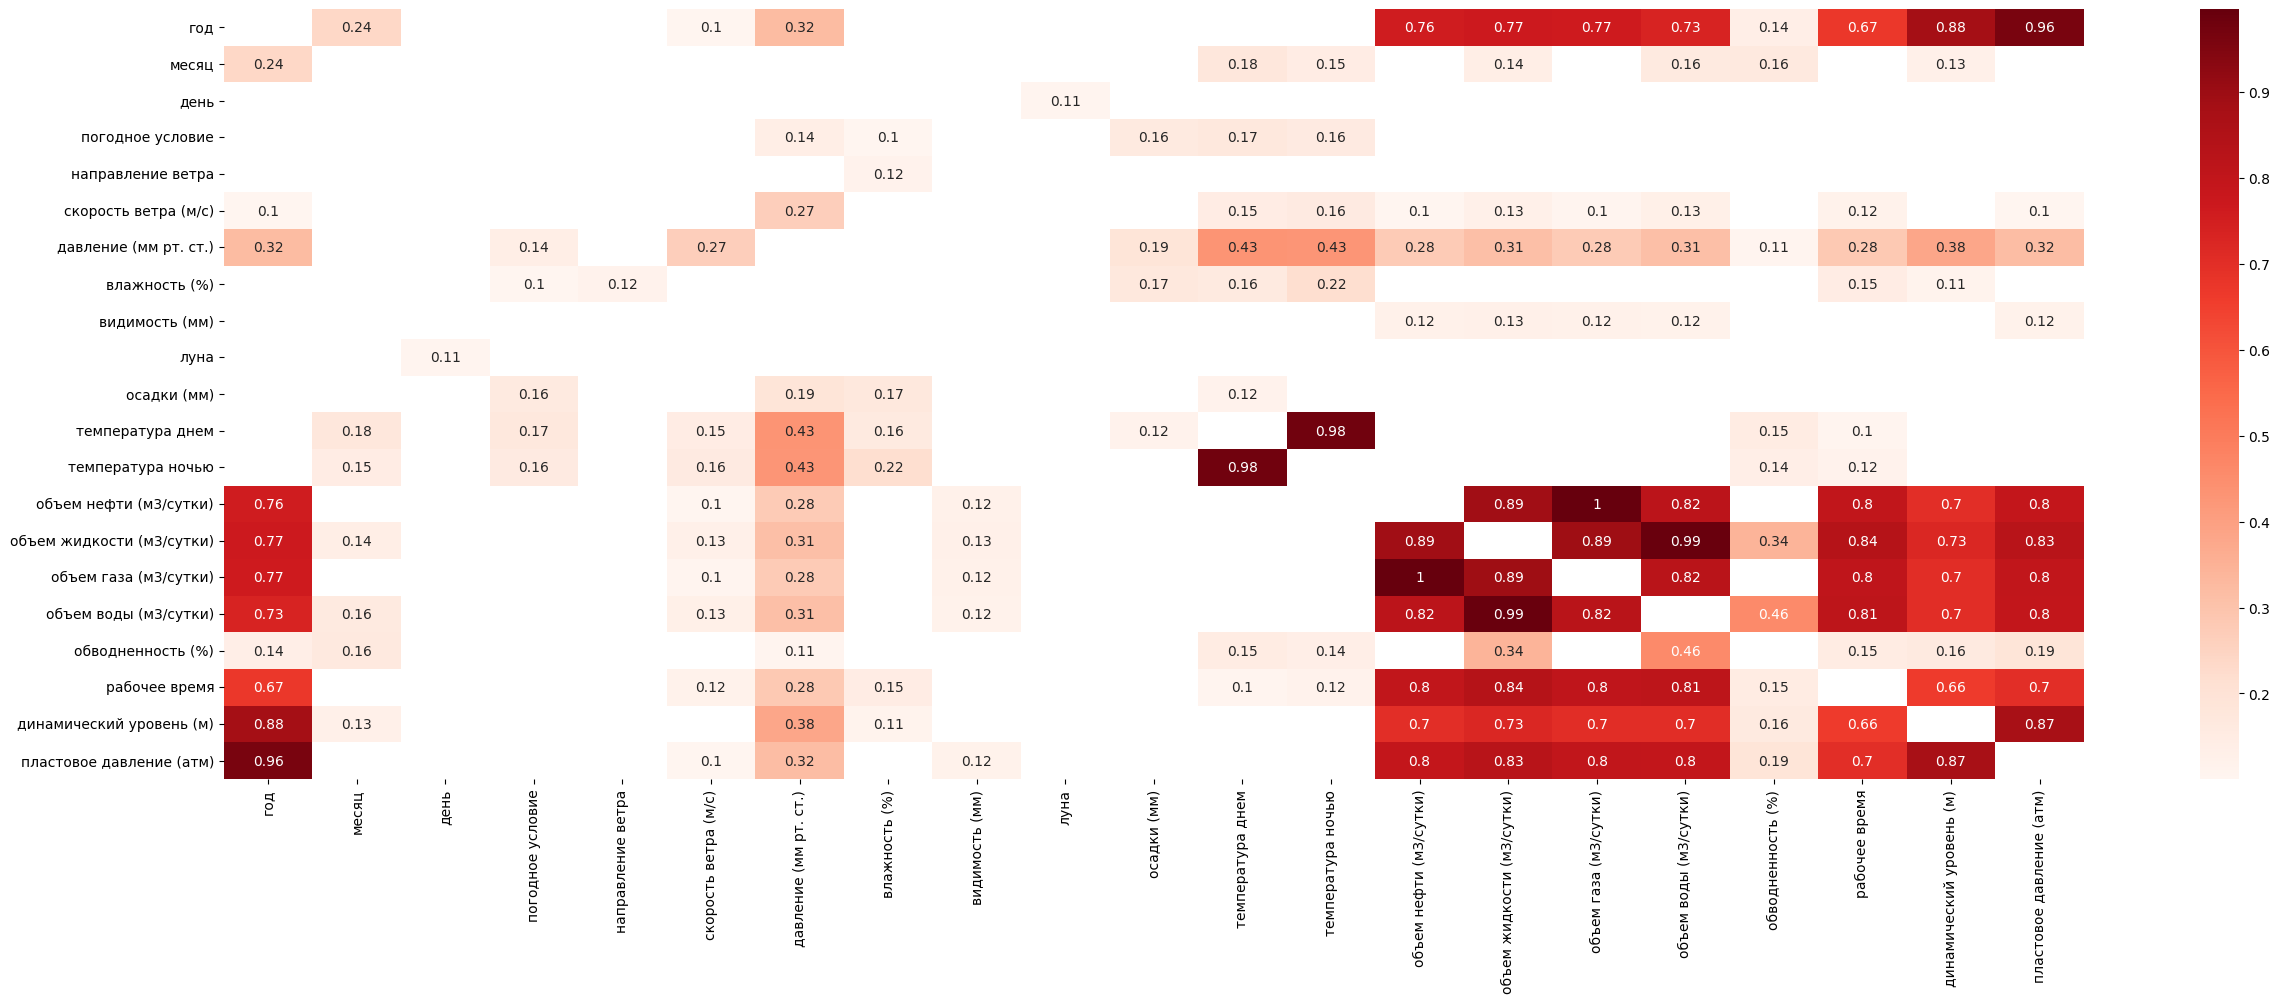

In [39]:
# наглядный график с высокой корреляцией
dataCorr = data.corr()
filteredDf = dataCorr[(abs(dataCorr) >= .1) & (dataCorr != 1.000)]
plt.figure(figsize=(30, 10))
sns.heatmap(abs(filteredDf), annot=True, cmap="Reds")
plt.show()

# Я не учитываю в корреляции ['погодное условие', 'направление ветра', 'луна'] так как это категориальные данные, переведенные в число.

In [40]:
# Разделение для задачи классификации на X (экзогенные переменные, т.е. регрессоры или независимые) и y (эндогенные переменные или зависимые)

# ['
#   'погодное условие',
#   'направление ветра',
#   'скорость ветра (м/с)',
#   'давление (мм рт. ст.)',
#   'влажность (%)',
#   'видимость (мм)',
#   'луна',
#   'осадки (мм)',
#   'температура днем',
#   'температура ночью'
# ]

# ['
#   'объем нефти (м3/сутки)',
#   'объем жидкости (м3/сутки)',
#   'объем газа (м3/сутки)',
#   'объем воды (м3/сутки)',
#   'обводненность (%)',
#   'рабочее время',
#   'динамический уровень (м)',
#   'пластовое давление (атм)'
# ]

X = data.drop([
  'объем нефти (м3/сутки)',
  'объем жидкости (м3/сутки)',
  'объем газа (м3/сутки)',
  'объем воды (м3/сутки)',
  'обводненность (%)',
  'рабочее время',
  'динамический уровень (м)',
  'пластовое давление (атм)'
], axis=1)

y = data[[
  'объем нефти (м3/сутки)',
  'объем жидкости (м3/сутки)',
  'объем газа (м3/сутки)',
  'объем воды (м3/сутки)',
  'обводненность (%)',
  'рабочее время',
  'динамический уровень (м)',
  'пластовое давление (атм)'
]]

X_original_1 = X
y_original_1 = y

# Уберу не нужные данные с датой, так как я не буду исследовать данные в зависимости от времени года
X = X.drop(['год', 'месяц', 'день'], axis=1)

In [41]:
# Подготовка данных

# Нормализация (MinMaxScaler)
scalar = MinMaxScaler()
features = scalar.fit_transform(X, y)
X_normalised = pd.DataFrame(features, columns=X.columns)
X_normalised

погодное условие  направление ветра  скорость ветра (м/с)  \
0                  0.6           0.571429              0.069767   
1                  1.0           0.571429              0.046512   
2                  0.2           0.285714              0.046512   
3                  0.6           0.571429              0.162791   
4                  0.6           0.142857              0.116279   
...                ...                ...                   ...   
1310               0.8           0.142857              0.162791   
1311               0.6           0.857143              0.046512   
1312               0.6           0.714286              0.093023   
1313               0.8           0.000000              0.162791   
1314               0.6           0.857143              0.069767   

      давление (мм рт. ст.)  влажность (%)  видимость (мм)      луна  \
0                  0.454545           0.56        0.009738  0.666667   
1                  0.428571           0.63        0.009738  0.666667   
2                  0.350649           0.51        0.009738  0.333333   
3                  0.298701           0.60        0.009738  1.000000   
4                  0.350649           0.50        0.009738  1.000000   
...                     ...            ...             ...       ...   
1310               0.441558           0.95        0.414597  0.666667   
1311               0.532468           0.87        0.009738  0.666667   
1312               0.389610           0.93        0.006894  0.666667   
1313               0.233766           0.93        0.143232  0.666667   
1314               0.194805           0.89        0.003392  0.666667   

      осадки (мм)  температура днем  температура ночью  
0             0.0          0.820896           0.776316  
1             0.0          0.820896           0.776316  
2             0.0          0.865672           0.802632  
3             0.0          0.835821           0.736842  
4             0.0          0.746269           0.631579  
...           ...               ...                ...  
1310          0.0          0.492537           0.434211  
1311          0.0          0.388060           0.328947  
1312          0.0          0.432836           0.394737  
1313          0.0          0.402985           0.355263  
1314          0.0          0.417910           0.289474  

[1315 rows x 10 columns]

In [42]:
# Построить распределение для всех числовых нормализированных переменных
figure = px.box(X_normalised)
figure.show()

In [43]:
# Разделение на тренировочную (80%), тестовую (10%) и валидационную (10%)
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.2, random_state=1024, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1024, shuffle=True)

# Рассмотрю разные алгоритмы
models = [
  LinearRegression(), # Метод наименьших квадратов
  RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # Случайный лес
  KNeighborsRegressor(n_neighbors=6), # Метод ближайших соседей
  # SVR(kernel='linear'), # Метод опорных векторов с линейным ядром (для одномерного массива y)
  # LogisticRegression() # Логистическая регрессия (для одномерного массива y)
  # DecisionTreeClassifier(max_depth=4, random_state=42), # Деревья решений
  # RandomForestClassifier(min_samples_split=5, n_estimators=1000), # Ансамбли деревьев решений
  # GradientBoostingClassifier(max_depth=1, n_estimators=1000), # Ансамбли градиентного спуска
  # KNeighborsClassifier(n_neighbors=5), # Обучение модели K-ближайших соседей
]

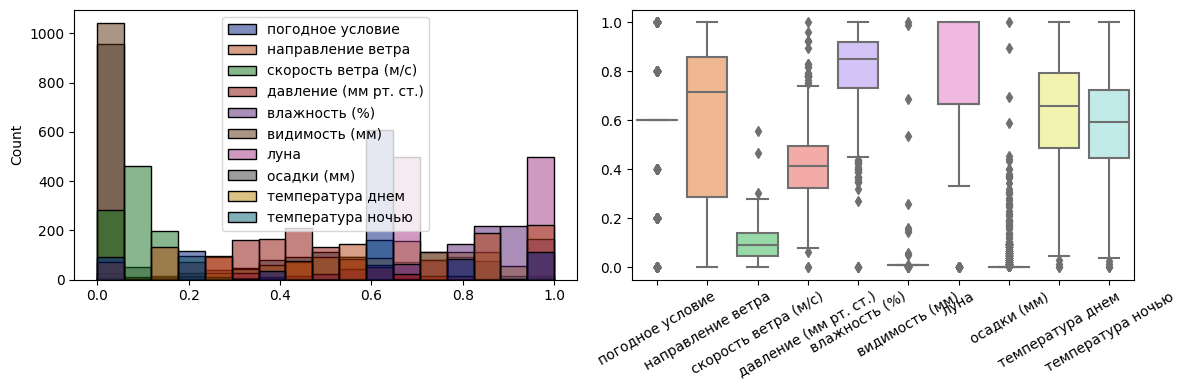

In [44]:
# Строю графики тренировочных данных
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=X_train, ax=axes[0], palette='dark')
boxplot = sns.boxplot(data=X_train, ax=axes[1], palette='pastel')
boxplot.tick_params(axis='x', rotation=30)
plt.tight_layout()

In [45]:
# Создаю временную структуру для графика
models_test = pd.DataFrame()
models_temp = {}

# Для каждой модели из списка
for model in models:
  # Для каждого столбцам результирующего набора
  for i in range(y_train.shape[1]):
    # Обучаю модель
    model.fit(X_train, y_train.iloc[:, i])
    print(f"\nМодель {type(model).__name__}:")
    print("Правильность на обучающем наборе: {:.3f}".format(model.score(X_train, y_train.iloc[:, i])))
    print("Правильность на тестовом наборе: {:.3f}".format(model.score(X_test, y_test.iloc[:, i])))
    # Коэффициент детерминации
    models_temp[f'R2_y{i + 1}'] = r2_score(y_test.iloc[:, 0], model.predict(X_test))
  models_test = pd.concat([models_test, pd.DataFrame([models_temp])], ignore_index=True)


Модель LinearRegression:
Правильность на обучающем наборе: 0.128
Правильность на тестовом наборе: 0.079

Модель LinearRegression:
Правильность на обучающем наборе: 0.142
Правильность на тестовом наборе: 0.122

Модель LinearRegression:
Правильность на обучающем наборе: 0.129
Правильность на тестовом наборе: 0.075

Модель LinearRegression:
Правильность на обучающем наборе: 0.139
Правильность на тестовом наборе: 0.122

Модель LinearRegression:
Правильность на обучающем наборе: 0.044
Правильность на тестовом наборе: -0.011

Модель LinearRegression:
Правильность на обучающем наборе: 0.182
Правильность на тестовом наборе: 0.165

Модель LinearRegression:
Правильность на обучающем наборе: 0.257
Правильность на тестовом наборе: 0.268

Модель LinearRegression:
Правильность на обучающем наборе: 0.192
Правильность на тестовом наборе: 0.179

Модель RandomForestRegressor:
Правильность на обучающем наборе: 0.902
Правильность на тестовом наборе: 0.187

Модель RandomForestRegressor:
Правильность на об

In [46]:
# Коэффициенты детерминации
models_test_abs = models_test.abs()
models_test_abs

R2_y1       R2_y2         R2_y3      R2_y4       R2_y5      R2_y6  \
0  0.078734  136.617551  1.003104e+06  63.064032  488.722200  12.731727   
1  0.186532  139.598742  1.011146e+06  64.503422  487.298359  12.740768   
2  0.083182  141.563418  1.031262e+06  65.850907  488.892107  12.980761   

           R2_y7        R2_y8  
0  475800.692359  1552.887861  
1  476106.725960  1556.975565  
2  473280.184347  1576.112447

In [47]:
# Масштабирую данные о 0 до 1 относительно каждого столбца
models_test_normalized = (models_test_abs-models_test_abs.min()) / (models_test_abs.max()-models_test_abs.min())
models_test_normalized

R2_y1     R2_y2   R2_y3     R2_y4     R2_y5     R2_y6     R2_y7     R2_y8
0  0.00000  0.000000  0.0000  0.000000  0.893392  0.000000  0.891729  0.000000
1  1.00000  0.602764  0.2856  0.516489  0.000000  0.036305  1.000000  0.176008
2  0.04126  1.000000  1.0000  1.000000  1.000000  1.000000  0.000000  1.000000

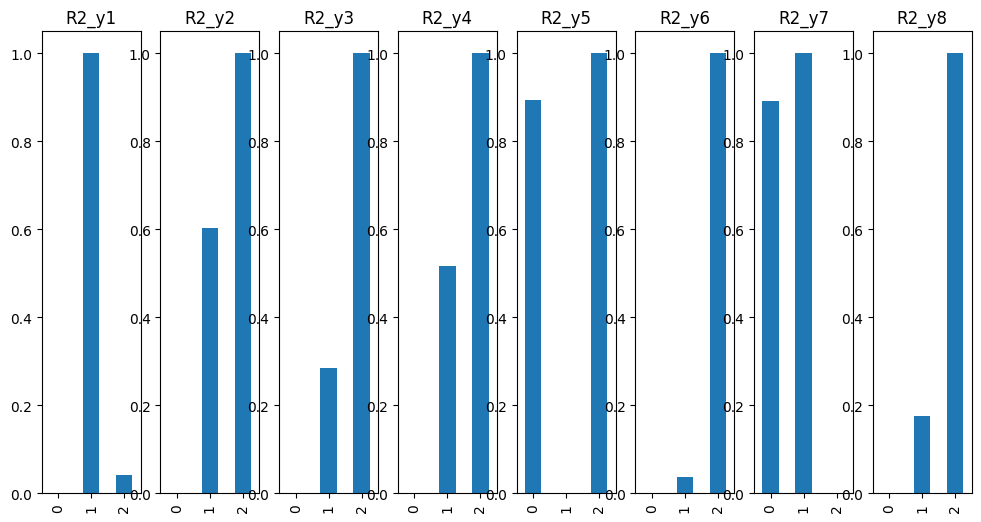

In [48]:
# Строю графики с коэффициентами детерминации
fig, axes = plt.subplots(ncols=y_train.shape[1], figsize=(12, 6))

for i in range(y_train.shape[1]):
  models_test_normalized[f'R2_y{i + 1}'].plot(ax=axes[i], kind='bar', title=f'R2_y{i + 1}')

In [49]:
# y1 = 'объем нефти (м3/сутки)',
# y2 = 'объем жидкости (м3/сутки)',
# y3 = 'объем газа (м3/сутки)',
# y4 = 'объем воды (м3/сутки)',
# y5 = 'обводненность (%)',
# y6 = 'рабочее время',
# y7 = 'динамический уровень (м)',
# y8 = 'пластовое давление (атм)'

# Как видно из графика:

# Метод наименьших квадратов (LinearRegression) подходит в большей степени для:
#   y5 = 'обводненность (%)',

# Случайный лес (RandomForestRegressor) подходит в большей степени для:
#   y3 = 'объем газа (м3/сутки)',
#   y4 = 'объем воды (м3/сутки)',
#   y7 = 'динамический уровень (м)',
#   y8 = 'пластовое давление (атм)'

# Метод ближайших соседей (KNeighborsRegressor) подходит в большей степени для:
#   y1 = 'объем нефти (м3/сутки)',
#   y2 = 'объем жидкости (м3/сутки)',
#   y4 = 'объем воды (м3/сутки)',
#   y5 = 'обводненность (%)',
#   y6 = 'рабочее время',

In [50]:
# Проведу анализ лучших признаков

# Для каждого столбца результирующего набора
for i in range(y_train.shape[1]):
  # Выбор 2 лучших признаков из 8 по Хи квадрат
  selector = SelectKBest(chi2, k=2)
  X_train_best = selector.fit_transform(X_train, y_train.iloc[:, i])
  # print(X_train_best.shape)
  X.columns[selector.get_support(indices=True)]
  vector_names = list(X.columns[selector.get_support(indices=True)])
  print(f'Для {[y.columns[i]]} лучшие признаки: {vector_names}')
  # X_train_best_df = pd.DataFrame(X_train_best, columns=selector.get_support(indices=True))
  # print(X_train_best_df)

Для ['объем нефти (м3/сутки)'] лучшие признаки: ['видимость (мм)', 'осадки (мм)']
Для ['объем жидкости (м3/сутки)'] лучшие признаки: ['видимость (мм)', 'осадки (мм)']
Для ['объем газа (м3/сутки)'] лучшие признаки: ['направление ветра', 'осадки (мм)']
Для ['объем воды (м3/сутки)'] лучшие признаки: ['видимость (мм)', 'температура ночью']
Для ['обводненность (%)'] лучшие признаки: ['температура днем', 'температура ночью']
Для ['рабочее время'] лучшие признаки: ['давление (мм рт. ст.)', 'видимость (мм)']
Для ['динамический уровень (м)'] лучшие признаки: ['осадки (мм)', 'температура днем']
Для ['пластовое давление (атм)'] лучшие признаки: ['температура днем', 'температура ночью']


In [51]:
# обучение лучшей модели с лучшими признаками
model_best = models[2]
model_best.fit(X_train, y_train)

# качество модели
score = model.score(X_test,y_test)
print("Accuracy: ", score*100) # A, P, R, E

Accuracy:  -0.3609410049226727


In [52]:
# предсказание на тестовой выборке
data_best = pd.DataFrame(model_best.predict(X_test), columns=[
  'объем нефти (м3/сутки)',
  'объем жидкости (м3/сутки)',
  'объем газа (м3/сутки)',
  'объем воды (м3/сутки)',
  'обводненность (%)',
  'рабочее время',
  'динамический уровень (м)',
  'пластовое давление (атм)'
])
data_best

объем нефти (м3/сутки)  объем жидкости (м3/сутки)  объем газа (м3/сутки)  \
0                  9.500000                  38.833333            2512.833333   
1                 10.666667                  42.833333            2854.666667   
2                 12.333333                  50.000000            3295.333333   
3                 13.000000                  49.500000            3484.833333   
4                  8.833333                  37.666667            2415.666667   
..                      ...                        ...                    ...   
126               10.833333                  41.000000            2906.333333   
127               10.333333                  45.500000            2785.666667   
128               11.833333                  45.500000            3136.333333   
129               12.833333                  50.333333            3413.500000   
130               10.333333                  43.166667            2807.666667   

     объем воды (м3/сутки)  обводненность (%)  рабочее время  \
0                29.500000          75.000000      18.333333   
1                32.166667          74.333333      20.000000   
2                38.000000          74.666667      22.666667   
3                36.666667          73.333333      21.833333   
4                28.666667          76.000000      18.166667   
..                     ...                ...            ...   
126              30.000000          73.166667      22.333333   
127              35.166667          75.666667      20.333333   
128              33.833333          73.500000      22.333333   
129              37.666667          74.166667      22.000000   
130              32.666667          74.833333      21.500000   

     динамический уровень (м)  пластовое давление (атм)  
0                 2097.000000                116.000000  
1                 2011.833333                123.333333  
2                 1906.166667                128.833333  
3                 1938.000000                137.166667  
4                 2029.666667                118.500000  
..                        ...                       ...  
126               2007.166667                123.666667  
127               2018.000000                121.666667  
128               1947.333333                129.833333  
129               1949.166667                132.833333  
130               1995.666667                128.666667  

[131 rows x 8 columns]

In [53]:
# score модели (метрики для классификации)
def model_report(model, X_train, y_train, X_test, y_test, average='weighted'):
  # Делаю предсказания на тренировочном наборе
  y_pred_train = model.predict(X_train)
  # Делаю предсказания на тестовом наборе
  y_pred_test = model.predict(X_test)

  # Оцениваю точность модели на тренировочном наборе
  print(f"Тренировочный набор - Матрица ошибок (confusion matrix) модели:\n{confusion_matrix(y_train, y_pred_train)}")
  print(f"Тренировочный набор - Правильность (accuracy) модели: {accuracy_score(y_train, y_pred_train)}")
  print(f"Тренировочный набор - Точность (precision) модели: {precision_score(y_train, y_pred_train, average=average)}")
  print(f"Тренировочный набор - Полнота (recall) модели: {recall_score(y_train, y_pred_train, average=average)}")
  print(f"Тренировочный набор - F1 мера модели: {f1_score(y_train, y_pred_train, average=average)}")
  print(f"Тренировочный набор - Средняя абсолютная ошибка (mean absolute error): {mean_absolute_error(y_train, y_pred_train)}\n\n")

  # Оцениваю точность модели на тестовом наборе
  print(f"Тестовый набор - Матрица ошибок (confusion matrix) модели:\n{confusion_matrix(y_test, y_pred_test)}")
  print(f"Тестовый набор - Правильность (accuracy) модели: {accuracy_score(y_test, y_pred_test)}")
  print(f"Тестовый набор - Точность (precision) модели: {precision_score(y_test, y_pred_test, average=average)}")
  print(f"Тестовый набор - Полнота (recall) модели: {recall_score(y_test, y_pred_test, average=average)}")
  print(f"Тестовый набор - F1 мера модели: {f1_score(y_test, y_pred_test, average=average)}")
  print(f"Тестовый набор - Средняя абсолютная ошибка (mean absolute error): {mean_absolute_error(y_test, y_pred_test)}\n\n")

In [54]:
# Сделаю обучение (KNeighborsRegressor) влияние температуры на обводненность
KNeighbors = KNeighborsRegressor(n_neighbors=6)
KNeighbors.fit(X_train[['температура днем', 'температура ночью']], y_train[['обводненность (%)']])
print(f"Тренировочный набор: {KNeighbors.score(X_train[['температура днем', 'температура ночью']], y_train[['обводненность (%)']])*100}")
print(f"Тестовый набор: {KNeighbors.score(X_test[['температура днем', 'температура ночью']], y_test[['обводненность (%)']])*100}")

Тренировочный набор: 16.395307331719867
Тестовый набор: -17.439005058563197


In [55]:
# Сделаю обучение (KNeighborsRegressor) влияние температуры на рабочее время
KNeighbors = KNeighborsRegressor(n_neighbors=6)
KNeighbors.fit(X_train[['температура днем', 'температура ночью']], y_train[['рабочее время']])
print(f"Тренировочный набор - {KNeighbors.score(X_train[['температура днем', 'температура ночью']], y_train[['рабочее время']])*100}")
print(f"Тестовый набор - {KNeighbors.score(X_test[['температура днем', 'температура ночью']], y_test[['рабочее время']])*100}")

Тренировочный набор - 16.15979485264859
Тестовый набор - -13.149164965054672


In [56]:
# Сделаю обучение (KNeighborsRegressor) влияние температуры на динамический уровень
KNeighbors = KNeighborsRegressor(n_neighbors=6)
KNeighbors.fit(X_train[['температура днем', 'температура ночью']], y_train[['динамический уровень (м)']])
print(f"Тренировочный набор - {KNeighbors.score(X_train[['температура днем', 'температура ночью']], y_train[['динамический уровень (м)']])*100}")
print(f"Тестовый набор - {KNeighbors.score(X_test[['температура днем', 'температура ночью']], y_test[['динамический уровень (м)']])*100}")

Тренировочный набор - 17.638855418680187
Тестовый набор - -13.732300456057267


In [57]:
# Сделаю обучение (KNeighborsRegressor) влияние температуры на пластовое давление
KNeighbors = KNeighborsRegressor(n_neighbors=6)
KNeighbors.fit(X_train[['температура днем', 'температура ночью']], y_train[['пластовое давление (атм)']])
print(f"Тренировочный набор - {KNeighbors.score(X_train[['температура днем', 'температура ночью']], y_train[['пластовое давление (атм)']])*100}")
print(f"Тестовый набор - {KNeighbors.score(X_test[['температура днем', 'температура ночью']], y_test[['пластовое давление (атм)']])*100}")

Тренировочный набор - 17.982970399459365
Тестовый набор - -20.80752391230103


# Как видно, показатели получены плохие. Исходя из логического мышления предметной области. Искусственное поднятие пластового давления зависит от закачки воды. Естественное поднятие пластового давления зависит от водоносного слоя, который подпирает нефть, что приводит к увеличению давления. Сам же водоносный слой зависит от осадков, чем больше остадков, тем выше водоносный слой.

In [58]:
# Сгруппирую данные по дням, месяцам и годам (среднее)
dataml_group = data.groupby(by=[data['месяц'], data['год']]).mean()

# Разделение для задачи классификации на X (экзогенные переменные, т.е. регрессоры или независимые) и y (эндогенные переменные или зависимые)
X = dataml_group.drop([
  'объем нефти (м3/сутки)',
  'объем жидкости (м3/сутки)',
  'объем газа (м3/сутки)',
  'объем воды (м3/сутки)',
  'обводненность (%)',
  'рабочее время',
  'динамический уровень (м)',
  'пластовое давление (атм)'
], axis=1)

y = dataml_group[[
  'объем нефти (м3/сутки)',
  'объем жидкости (м3/сутки)',
  'объем газа (м3/сутки)',
  'объем воды (м3/сутки)',
  'обводненность (%)',
  'рабочее время',
  'динамический уровень (м)',
  'пластовое давление (атм)'
]]

# Разделение на тренировочную (80%), тестовую (10%) и валидационную (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1024, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=32, shuffle=True)
X_values = [
  'погодное условие',
  'направление ветра',
  'скорость ветра (м/с)',
  'давление (мм рт. ст.)',
  'влажность (%)',
  'видимость (мм)',
  'луна',
  'осадки (мм)',
  'температура днем',
  'температура ночью'
]
y_values = [
  'пластовое давление (атм)'
]

X_train_original_1 = X_train
y_train_original_1 = y_train
X_test_original_1 = X_test
y_test_original_1 = y_test

# Случайный лес
RandomForest = RandomForestRegressor(n_estimators=100)
RandomForest.fit(X_train[X_values], y_train[y_values])
print(f"Тренировочный набор - {RandomForest.score(X_train[X_values], y_train[y_values])*100}")
print(f"Тестовый набор - {RandomForest.score(X_test[X_values], y_test[y_values])*100}")

# Как видно, качество повысилось, благодаря группировки данных и изучению предметной области

Тренировочный набор - 91.6475147518685
Тестовый набор - 49.539771693201416


<ipython-input-58-3d8b594e4fb8>:53: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [59]:
# Bagging
Bagging = BaggingRegressor()
Bagging.fit(X_train[X_values], y_train[y_values])
print(f"Тренировочный набор - {Bagging.score(X_train[X_values], y_train[y_values])*100}")
print(f"Тестовый набор - {Bagging.score(X_test[X_values], y_test[y_values])*100}")

Тренировочный набор - 84.00485857687848
Тестовый набор - 49.18438266534374


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [60]:
# AdaBoost
AdaBoost = AdaBoostRegressor(n_estimators=100)
AdaBoost.fit(X_train[X_values], y_train[y_values])
print(f"Тренировочный набор - {AdaBoost.score(X_train[X_values], y_train[y_values])*100}")
print(f"Тестовый набор - {AdaBoost.score(X_test[X_values], y_test[y_values])*100}")

Тренировочный набор - 95.78343406617029
Тестовый набор - 65.36930893646279


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [61]:
# CatBoost
CatBoost = CatBoostRegressor(n_estimators=100)
CatBoost.fit(X_train[X_values], y_train[y_values])
print(f"Тренировочный набор - {CatBoost.score(X_train[X_values], y_train[y_values])*100}")
print(f"Тестовый набор - {CatBoost.score(X_test[X_values], y_test[y_values])*100}")

Learning rate set to 0.156726
0:	learn: 14.7357818	total: 46.4ms	remaining: 4.59s
1:	learn: 14.0646781	total: 47.1ms	remaining: 2.31s
2:	learn: 13.1516413	total: 47.7ms	remaining: 1.54s
3:	learn: 12.4391094	total: 48.3ms	remaining: 1.16s
4:	learn: 11.6696174	total: 48.9ms	remaining: 929ms
5:	learn: 11.0000624	total: 49.5ms	remaining: 775ms
6:	learn: 10.4304709	total: 50ms	remaining: 664ms
7:	learn: 9.8767462	total: 50.6ms	remaining: 582ms
8:	learn: 9.4123287	total: 51.1ms	remaining: 517ms
9:	learn: 8.9419666	total: 51.8ms	remaining: 466ms
10:	learn: 8.5174687	total: 52.4ms	remaining: 424ms
11:	learn: 8.1642163	total: 53ms	remaining: 389ms
12:	learn: 7.7683681	total: 53.5ms	remaining: 358ms
13:	learn: 7.3898069	total: 54.2ms	remaining: 333ms
14:	learn: 7.0304203	total: 54.8ms	remaining: 311ms
15:	learn: 6.7974104	total: 55.4ms	remaining: 291ms
16:	learn: 6.5742341	total: 55.9ms	remaining: 273ms
17:	learn: 6.2601033	total: 56.5ms	remaining: 258ms
18:	learn: 5.9322011	total: 57.2ms	remain

In [62]:
# XGBoost
XGBoost = XGBRegressor(n_estimators=100)
XGBoost.fit(X_train[X_values], y_train[y_values])
print(f"Тренировочный набор - {XGBoost.score(X_train[X_values], y_train[y_values])*100}")
print(f"Тестовый набор - {XGBoost.score(X_test[X_values], y_test[y_values])*100}")

Тренировочный набор - 99.99999986367433
Тестовый набор - 31.968238098896464


# На данный момент, лучшие результаты показывают алгоритмы: RandomForest и AdaBoost. Использую Feature engineering.

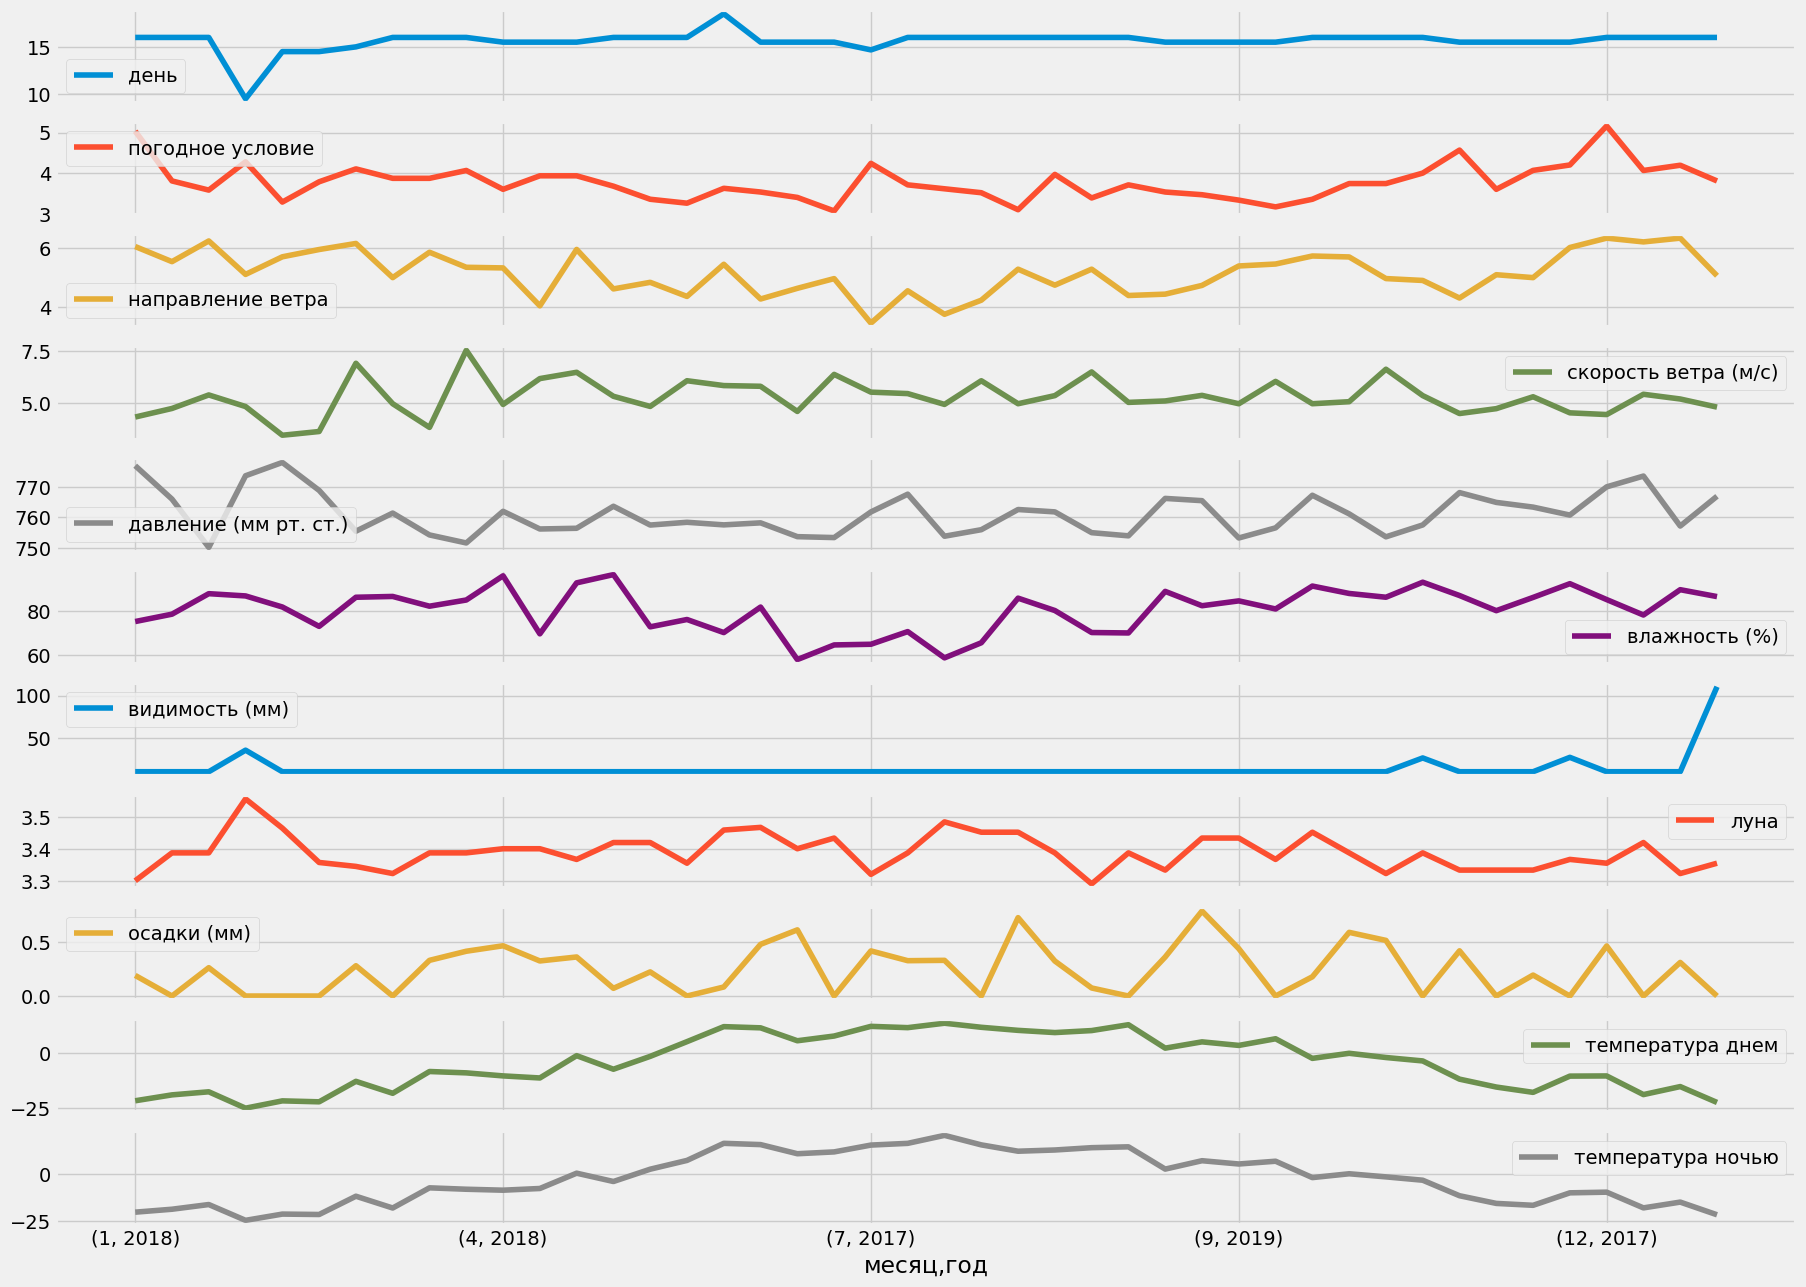

In [63]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('fivethirtyeight')
X.plot(subplots=True, sharex=True, figsize=(20, 15))
plt.show()

In [64]:
X_drop = X_original_1
X_drop['id'] = X_drop.index
X_drop = X_drop.drop(['год', 'месяц', 'день'], axis=1)
X_drop.describe().T

count        mean         std    min    25%    50%  \
погодное условие       1315.0    3.774144    1.310861    1.0    4.0    4.0   
направление ветра      1315.0    5.161977    2.315407    1.0    3.0    5.0   
скорость ветра (м/с)   1315.0    5.283650    2.805626    1.0    3.0    5.0   
давление (мм рт. ст.)  1315.0  760.999240   10.345662  729.0  754.0  761.0   
влажность (%)          1315.0   80.827376   15.196526    0.0   73.5   85.0   
видимость (мм)         1315.0   13.486616   47.630362    1.1   10.0   10.0   
луна                   1315.0    3.387072    0.679097    1.0    3.0    3.0   
осадки (мм)            1315.0    0.241521    0.914084    0.0    0.0    0.0   
температура днем       1315.0   -4.150570   13.499766  -46.0  -14.0   -2.0   
температура ночью      1315.0   -2.285932   14.540095  -46.0  -12.0   -1.0   
id                     1315.0  657.000000  379.752112    0.0  328.5  657.0   

                         75%     max  
погодное условие         4.0     6.0  
направление ветра        7.0     8.0  
скорость ветра (м/с)     7.0    44.0  
давление (мм рт. ст.)  767.0   806.0  
влажность (%)           92.0   100.0  
видимость (мм)          10.0   915.0  
луна                     4.0     4.0  
осадки (мм)              0.0    13.4  
температура днем         7.0    21.0  
температура ночью       10.0    30.0  
id                     985.5  1314.0

In [65]:
# Минимальный параметр
settings_min = settings.MinimalFCParameters()
settings_min

{'sum_values': None, 'median': None, 'mean': None, 'length': None, 'standard_deviation': None, 'variance': None, 'root_mean_square': None, 'maximum': None, 'absolute_maximum': None, 'minimum': None}

In [66]:
extracted_features = extract_features(X_drop, column_id="id", impute_function=impute, default_fc_parameters=settings_min)

Feature Extraction: 100%|██████████| 13150/13150 [00:03<00:00, 3334.28it/s]


In [67]:
extracted_features

погодное условие__sum_values  погодное условие__median  \
0                              4.0                       4.0   
1                              6.0                       6.0   
2                              2.0                       2.0   
3                              4.0                       4.0   
4                              4.0                       4.0   
...                            ...                       ...   
1310                           5.0                       5.0   
1311                           4.0                       4.0   
1312                           4.0                       4.0   
1313                           5.0                       5.0   
1314                           4.0                       4.0   

      погодное условие__mean  погодное условие__length  \
0                        4.0                       1.0   
1                        6.0                       1.0   
2                        2.0                       1.0   
3                        4.0                       1.0   
4                        4.0                       1.0   
...                      ...                       ...   
1310                     5.0                       1.0   
1311                     4.0                       1.0   
1312                     4.0                       1.0   
1313                     5.0                       1.0   
1314                     4.0                       1.0   

      погодное условие__standard_deviation  погодное условие__variance  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                         0.0   
...                                    ...                         ...   
1310                                   0.0                         0.0   
1311                                   0.0                         0.0   
1312                                   0.0                         0.0   
1313                                   0.0                         0.0   
1314                                   0.0                         0.0   

      погодное условие__root_mean_square  погодное условие__maximum  \
0                                    4.0                        4.0   
1                                    6.0                        6.0   
2                                    2.0                        2.0   
3                                    4.0                        4.0   
4                                    4.0                        4.0   
...                                  ...                        ...   
1310                                 5.0                        5.0   
1311                                 4.0                        4.0   
1312                                 4.0                        4.0   
1313                                 5.0                        5.0   
1314                                 4.0                        4.0   

      погодное условие__absolute_maximum  погодное условие__minimum  ...  \
0                                    4.0                        4.0  ...   
1                                    6.0                        6.0  ...   
2                                    2.0                        2.0  ...   
3                                    4.0                        4.0  ...   
4                                    4.0                        4.0  ...   
...                                  ...                        ...  ...   
1310                                 5.0                        5.0  ...   
1311                                 4.0                        4.0  ...   
1312                                 4.0                        4.0  ...   
1313                                 5

In [68]:
extracted_features.describe().T

count       mean        std   min  \
погодное условие__sum_values          1315.0   3.774144   1.310861   1.0   
погодное условие__median              1315.0   3.774144   1.310861   1.0   
погодное условие__mean                1315.0   3.774144   1.310861   1.0   
погодное условие__length              1315.0   1.000000   0.000000   1.0   
погодное условие__standard_deviation  1315.0   0.000000   0.000000   0.0   
...                                      ...        ...        ...   ...   
температура ночью__variance           1315.0   0.000000   0.000000   0.0   
температура ночью__root_mean_square   1315.0  11.923954   8.622931   0.0   
температура ночью__maximum            1315.0  -2.285932  14.540095 -46.0   
температура ночью__absolute_maximum   1315.0  11.923954   8.622931   0.0   
температура ночью__minimum            1315.0  -2.285932  14.540095 -46.0   

                                       25%   50%   75%   max  
погодное условие__sum_values           4.0   4.0   4.0   6.0  
погодное условие__median               4.0   4.0   4.0   6.0  
погодное условие__mean                 4.0   4.0   4.0   6.0  
погодное условие__length               1.0   1.0   1.0   1.0  
погодное условие__standard_deviation   0.0   0.0   0.0   0.0  
...                                    ...   ...   ...   ...  
температура ночью__variance            0.0   0.0   0.0   0.0  
температура ночью__root_mean_square    5.0  11.0  17.0  46.0  
температура ночью__maximum           -12.0  -1.0  10.0  30.0  
температура ночью__absolute_maximum    5.0  11.0  17.0  46.0  
температура ночью__minimum           -12.0  -1.0  10.0  30.0  

[100 rows x 8 columns]

In [69]:
# доля пропусков
# проверяю параметры на 0. Если вся строка 0 - отфильтровываем
extracted_features.isnull().sum().sum()

0

In [70]:
# смотрю пропуски
extracted_features.isnull().mean()

погодное условие__sum_values            0.0
погодное условие__median                0.0
погодное условие__mean                  0.0
погодное условие__length                0.0
погодное условие__standard_deviation    0.0
                                       ... 
температура ночью__variance             0.0
температура ночью__root_mean_square     0.0
температура ночью__maximum              0.0
температура ночью__absolute_maximum     0.0
температура ночью__minimum              0.0
Length: 100, dtype: float64

In [71]:
# БЕЗ ГРУППИРОВКИ
# разделим данные  на тестовую (20%) и тренировочную выборки (80%)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(extracted_features, y_original_1, test_size=0.2, random_state=1024, shuffle=True)
X_test_ext, X_val_ext, y_test_ext, y_val_ext = train_test_split(extracted_features, y_original_1, test_size=0.5, random_state=32, shuffle=True)

# X_values = [
#   'погодное условие',
#   'направление ветра',
#   'скорость ветра (м/с)',
#   'давление (мм рт. ст.)',
#   'влажность (%)',
#   'видимость (мм)',
#   'луна',
#   'осадки (мм)',
#   'температура днем',
#   'температура ночью'
# ]
y_values = [
  'пластовое давление (атм)'
]

# Случайный лес
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train_ext, y_train_ext[y_values])
print(f"Тренировочный набор - {forest.score(X_train_ext, y_train_ext[y_values])*100}")
print(f"Тестовый набор - {forest.score(X_test_ext, y_test_ext[y_values])*100}")

<ipython-input-71-5f496bcd2354>:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Тренировочный набор - 90.84291370829932
Тестовый набор - 79.55411992060002


In [72]:
# С ГРУППИРОВКОЙ
X_drop = X
X_drop['id'] = X_drop.index
X_drop = X_drop.drop(['день'], axis=1)

extracted_features = extract_features(X_drop, column_id="id", impute_function=impute, default_fc_parameters=settings_min)

# разделим данные  на тестовую (20%) и тренировочную выборки (80%)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(extracted_features, y, test_size=0.2, random_state=1024, shuffle=True)
X_test_ext, X_val_ext, y_test_ext, y_val_ext = train_test_split(extracted_features, y, test_size=0.5, random_state=32, shuffle=True)

# X_values = [
#   'погодное условие',
#   'направление ветра',
#   'скорость ветра (м/с)',
#   'давление (мм рт. ст.)',
#   'влажность (%)',
#   'видимость (мм)',
#   'луна',
#   'осадки (мм)',
#   'температура днем',
#   'температура ночью'
# ]
y_values = [
  'пластовое давление (атм)'
]

X_train_original_2 = X_train_ext
y_train_original_2 = y_train_ext
X_test_original_2 = X_test_ext
y_test_original_2 = y_test_ext

# Случайный лес
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train_ext, y_train_ext[y_values])
print(f"Тренировочный набор - {forest.score(X_train_ext, y_train_ext[y_values])*100}")
print(f"Тестовый набор - {forest.score(X_test_ext, y_test_ext[y_values])*100}")

Feature Extraction: 100%|██████████| 440/440 [00:00<00:00, 3984.42it/s]
<ipython-input-72-2a405d4456fa>:35: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Тренировочный набор - 91.18210195604976
Тестовый набор - 86.3432308966019


# Получил показатели благодаря изучению предметной области, группировки данных по году и месяцу, а также применению Feature engineering:
# Тренировочный набор - 91.18210195604976
# Тестовый набор - 86.3432308966019

In [73]:
# Список признаков с весами
feature_names_str = [f"col{col}" for col in extracted_features.columns.tolist()]
cols = [col.replace("col", "") for col in feature_names_str[:12]]
cols

['погодное условие__sum_values',
 'погодное условие__median',
 'погодное условие__mean',
 'погодное условие__length',
 'погодное условие__standard_deviation',
 'погодное условие__variance',
 'погодное условие__root_mean_square',
 'погодное условие__maximum',
 'погодное условие__absolute_maximum',
 'погодное условие__minimum',
 'направление ветра__sum_values',
 'направление ветра__median']

In [74]:
# Вес каждого фактора в итоговой моделей
forest.feature_importances_

array([0.01110124, 0.00376303, 0.00664314, 0.        , 0.        ,
       0.        , 0.00532122, 0.00380422, 0.00233799, 0.00990249,
       0.00567678, 0.00494008, 0.0077085 , 0.        , 0.        ,
       0.        , 0.00347022, 0.00112358, 0.00521006, 0.00316561,
       0.00681459, 0.00927315, 0.0091813 , 0.        , 0.        ,
       0.        , 0.00304932, 0.01061362, 0.00661767, 0.0085948 ,
       0.05555448, 0.05781806, 0.0976463 , 0.        , 0.        ,
       0.        , 0.06320502, 0.06481816, 0.06848209, 0.06010482,
       0.00587952, 0.00282881, 0.00155974, 0.        , 0.        ,
       0.        , 0.00379852, 0.00265815, 0.00661856, 0.00414406,
       0.00606337, 0.00502829, 0.00339995, 0.        , 0.        ,
       0.        , 0.00294864, 0.00768203, 0.01582638, 0.02572956,
       0.00715024, 0.00652644, 0.01064579, 0.        , 0.        ,
       0.        , 0.00869247, 0.00743762, 0.00587523, 0.01118569,
       0.00649064, 0.01403686, 0.02501023, 0.        , 0.     

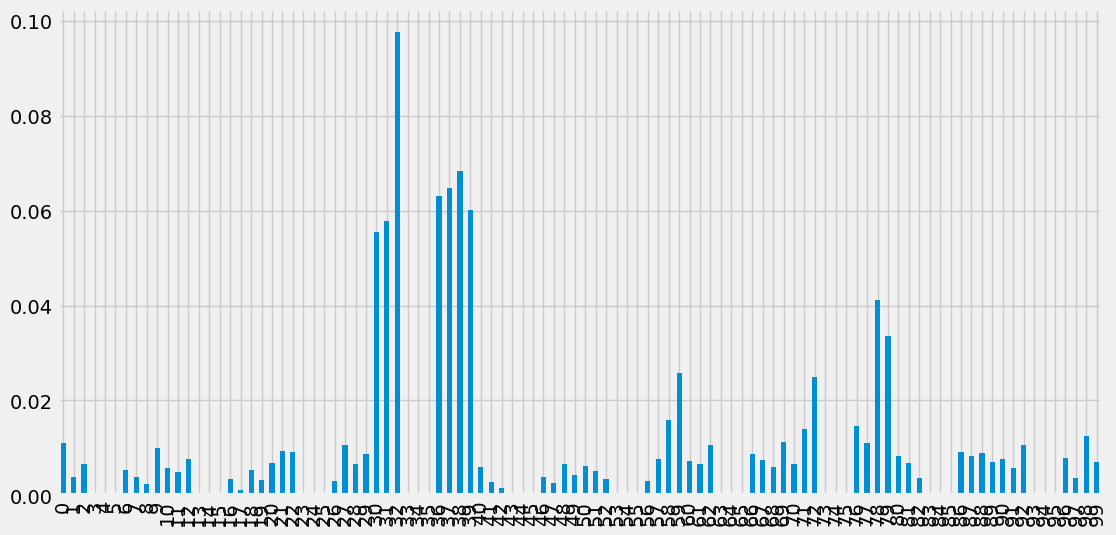

In [75]:
plot = pd.Series(data=forest.feature_importances_).plot(kind='bar')
plot.tick_params(axis='x', rotation=90)

In [77]:
# Сохраню модели
joblib.dump(RandomForest, '/content/model.pkl') # без Feature engineering
joblib.dump(forest, '/content/model_fe.pkl') # с Feature engineering

['/content/model_fe.pkl']

In [78]:
# Загружу модели
RandomForest = joblib.load('/content/model.pkl') # без Feature engineering
forest = joblib.load('/content/model_fe.pkl') # с Feature engineering

In [79]:
# Использую загруженные модели для предсказания
# без Feature engineering
# Тренировочный набор - 91.07214646869724
# Тестовый набор - 53.455281999856
X_test_pred = X_test_original_1.drop(['день'], axis=1)
y_pred = RandomForest.predict(X_test_pred)
y_pred

array([136.61433458, 111.77085091, 124.35847849, 139.89336129])

In [80]:
# Использую загруженные модели для предсказания
# с Feature engineering
# Тренировочный набор - 91.25531053440886
# Тестовый набор - 88.85372762794663
y_pred = forest.predict(X_test_original_2)
y_pred

array([106.69803226, 111.01328263, 144.80307742, 108.22558602,
       121.72135215, 138.03882312, 129.24238863, 143.36165054,
       116.70924416, 128.64541782, 129.36124731, 135.97172898,
       121.22527601, 136.87393241, 114.18862811, 110.03554531,
       135.30527903, 121.53794194, 110.13177957, 143.8225    ,
       128.80022273, 110.8277043 ])

In [81]:
# Пример ввода собственных данных
# без Feature engineering
y_pred = RandomForest.predict([[
  1, # погодное условие
  1, # направление ветра
  1, # скорость ветра (м/с)
  1, # давление (мм рт. ст.)
  1, # влажность (%)
  1, # видимость (мм)
  1, # луна
  1, # осадки (мм)
  1, # температура днем
  1, # температура ночью
]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([119.90744828])

In [82]:
# Пример ввода собственных данных
# с Feature engineering
y_pred = forest.predict([[
  1, # погодное условие__sum_values
  1, # погодное условие__median
  1, # погодное условие__mean
  1, # погодное условие__length
  1, # погодное условие__standard_deviation
  1, # погодное условие__variance
  1, # погодное условие__root_mean_square
  1, # погодное условие__maximum
  1, # погодное условие__absolute_maximum
  1, # погодное условие__minimum
  1, # направление ветра__sum_values
  1, # направление ветра__median
  1, # направление ветра__mean
  1, # направление ветра__length
  1, # направление ветра__standard_deviation
  1, # направление ветра__variance
  1, # направление ветра__root_mean_square
  1, # направление ветра__maximum
  1, # направление ветра__absolute_maximum
  1, # направление ветра__minimu
  1, # скорость ветра (м/с)__sum_values
  1, # скорость ветра (м/с)__median
  1, # скорость ветра (м/с)__mean
  1, # скорость ветра (м/с)__length
  1, # скорость ветра (м/с)__standard_deviation
  1, # скорость ветра (м/с)__variance
  1, # скорость ветра (м/с)__root_mean_square
  1, # скорость ветра (м/с)__maximum
  1, # скорость ветра (м/с)__absolute_maximum
  1, # скорость ветра (м/с)__minimum
  1, # давление (мм рт. ст.)__sum_values
  1, # давление (мм рт. ст.)__median
  1, # давление (мм рт. ст.)__mean
  1, # давление (мм рт. ст.)__length
  1, # давление (мм рт. ст.)__standard_deviation
  1, # давление (мм рт. ст.)__variance
  1, # давление (мм рт. ст.)__root_mean_square
  1, # давление (мм рт. ст.)__maximum
  1, # давление (мм рт. ст.)__absolute_maximum
  1, # давление (мм рт. ст.)__minimum
  1, # влажность (%)__sum_values
  1, # влажность (%)__median
  1, # влажность (%)__mean
  1, # влажность (%)__length
  1, # влажность (%)__standard_deviation
  1, # влажность (%)__variance
  1, # влажность (%)__root_mean_square
  1, # влажность (%)__maximum
  1, # влажность (%)__absolute_maximum
  1, # влажность (%)__minimum
  1, # видимость (мм)__sum_values
  1, # видимость (мм)__median
  1, # видимость (мм)__mean
  1, # видимость (мм)__length
  1, # видимость (мм)__standard_deviation
  1, # видимость (мм)__variance
  1, # видимость (мм)__root_mean_square
  1, # видимость (мм)__maximum
  1, # видимость (мм)__absolute_maximum
  1, # видимость (мм)__minimum
  1, # луна__sum_values
  1, # луна__median
  1, # луна__mean
  1, # луна__length
  1, # луна__standard_deviation
  1, # луна__variance
  1, # луна__root_mean_square
  1, # луна__maximum
  1, # луна__absolute_maximum
  1, # луна__minimum
  1, # осадки (мм)__sum_values
  1, # осадки (мм)__median
  1, # осадки (мм)__mean
  1, # осадки (мм)__length
  1, # осадки (мм)__standard_deviation
  1, # осадки (мм)__variance
  1, # осадки (мм)__root_mean_square
  1, # осадки (мм)__maximum
  1, # осадки (мм)__absolute_maximum
  1, # осадки (мм)__minimum
  1, # температура днем__sum_values
  1, # температура днем__median
  1, # температура днем__mean
  1, # температура днем__length
  1, # температура днем__standard_deviation
  1, # температура днем__variance
  1, # температура днем__root_mean_square
  1, # температура днем__maximum
  1, # температура днем__absolute_maximum
  1, # температура днем__minimum
  1, # температура ночью__sum_values
  1, # температура ночью__median
  1, # температура ночью__mean
  1, # температура ночью__length
  1, # температура ночью__standard_deviation
  1, # температура ночью__variance
  1, # температура ночью__root_mean_square
  1, # температура ночью__maximum
  1, # температура ночью__absolute_maximum
  1, # температура ночью__minimum
]])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([119.70870699])

# Итог:
### Задав новые данные погодных условий:
###   'погодное условие',
###   'направление ветра',
###   'скорость ветра (м/с)',
###   'давление (мм рт. ст.)',
###   'влажность (%)',
###   'видимость (мм)',
###   'луна',
###   'осадки (мм)',
###   'температура днем',
###   'температура ночью'
### .
### Получу результат:
###   'пластовое давление (атм)'
### .
### Это давление влияет на увеличение давления нефти. Что может привести к поломке оборудования нефтяной скважины №807.